# üöó Araba Fiyat Tahmin Projesi (Car Price Prediction)

## üìã Proje √ñzeti
Bu proje, makine √∂ƒürenmesi algoritmalarƒ± kullanarak arabalarƒ±n fiyatlarƒ±nƒ± tahmin etmeyi ama√ßlamaktadƒ±r. Projede **CatBoost**, **Stacking Regressor**, **Voting Regressor**, **Extra Trees**, **XGBoost**, **LightGBM**, **Gradient Boosting**, **MLP**, **SVR**, **Ridge Regression**, **Elastic Net**, **Lasso Regression**, **Deep Neural Network**, **Linear Regression** ve **Random Forest** modelleri kar≈üƒ±la≈ütƒ±rƒ±lmƒ±≈ü ve en iyi performans g√∂steren model se√ßilmi≈ütir.

### üéØ Hedefler:
- Araba √∂zelliklerinden fiyat tahmini yapma
- Farklƒ± ML algoritmalarƒ±nƒ± kar≈üƒ±la≈ütƒ±rma
- Model performansƒ±nƒ± optimize etme
- En iyi modeli kaydetme

### üìä Kullanƒ±lan Veri Seti:
- **Kaynak**: Car_Raw_Data.csv
- **Hedef Deƒüi≈üken**: Araba Fiyatƒ± (Price)
- **√ñzellikler**: Marka, Model, Yƒ±l, Motor Hacmi, Kilometre, vb.

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning k√ºt√ºphaneleri
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import joblib

# Gradient Boosting k√ºt√ºphaneleri
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Deep Learning k√ºt√ºphaneleriƒ∞
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
sns.set()

## üìö 1. K√ºt√ºphanelerin ƒ∞√ße Aktarƒ±lmasƒ±
Gerekli Python k√ºt√ºphanelerini i√ße aktarƒ±yoruz.

In [3]:
car_raw = pd.read_csv('Car_Raw_Data.csv')
car_raw.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

## üìÇ 2. Veri Setinin Y√ºklenmesi
Ham veri setini y√ºkl√ºyoruz ve ilk 5 satƒ±rƒ±na bakƒ±yoruz.

### Ham veriyi √∂ni≈üleme

In [4]:
car_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [5]:
car_raw.describe(include="all")

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

## üîß 3. Veri √ñn ƒ∞≈üleme (Data Preprocessing)
### 3.1 Veri Setinin Genel Bilgileri

In [6]:
car_raw.drop("Model", axis=1, inplace=True)
car_raw.describe(include="all")

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4345         4345  4345.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          2019         3947          NaN  
mean           NaN          NaN  2006.550058  
std            NaN          NaN     6.719097  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

Model s√ºtununu kaldƒ±rƒ±yoruz (√ßok fazla benzersiz deƒüer i√ßeriyor ve ilk analizde kullanmayacaƒüƒ±z).

### Ham verideki eksik deƒüerleri tespit etme

In [7]:
car_raw.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
car_raw.dropna(inplace=True)
car_raw.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

Eksik deƒüerleri i√ßeren satƒ±rlarƒ± kaldƒ±rdƒ±k. Artƒ±k veri setinde eksik deƒüer bulunmuyor.

### Olasƒ±lƒ±k Daƒüƒ±lƒ±mlarƒ±nƒ± Ke≈üfetme

### 3.2 Eksik Deƒüerlerin Tespit Edilmesi ve Temizlenmesi

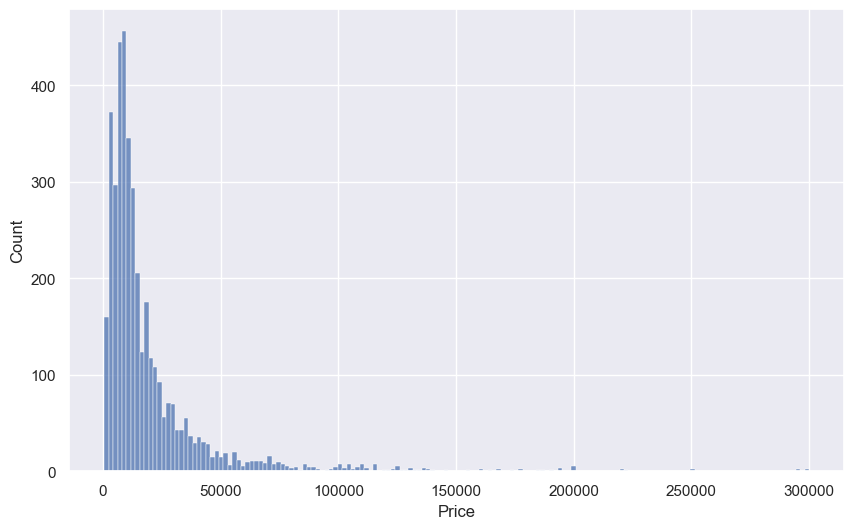

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(car_raw['Price'])
plt.show()

Veri seti i√ßinde yer alan fiyat aralƒ±ƒüƒ±nƒ± kontrol ettiƒüimizde deƒüerlerin bir d√ºzene g√∂re sƒ±ralandƒ±ƒüƒ±nƒ± g√∂r√ºyoruz. Ancak d√ºzene uymayan bazƒ± deƒüerler mevcut bunun i√ßin quantile(0.99) ile %1'ini kaldƒ±rƒ±yoruz

In [10]:
q = car_raw['Price'].quantile(0.99)
q

129812.51999999981

burda tespit edilen deƒüerin √ºzerindeki verileri kullanmayƒ± tercih etmiyoruz

## üìä 4. Ke≈üifsel Veri Analizi (Exploratory Data Analysis)
### 4.1 Fiyat Daƒüƒ±lƒ±mƒ±nƒ±n ƒ∞ncelenmesi

In [11]:
car_1 = car_raw[car_raw['Price'] < q]
car_1.describe(include="all")

Brand          Price   Body      Mileage      EngineV  \
count         3984    3984.000000   3984  3984.000000  3984.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1528          NaN          NaN   
mean           NaN   17837.117460    NaN   165.116466     2.743770   
std            NaN   18976.268315    NaN   102.766126     4.956057   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6980.000000    NaN    93.000000     1.800000   
50%            NaN   11400.000000    NaN   160.000000     2.200000   
75%            NaN   21000.000000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         3984         3984  3984.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1853         3613          NaN  
mean           NaN          NaN  2006.292922  
std            NaN          NaN     6.672745  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2002.750000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

Text(0.5, 1.0, 'Aykƒ±rƒ± deƒüerler dahil edildiƒüinde')

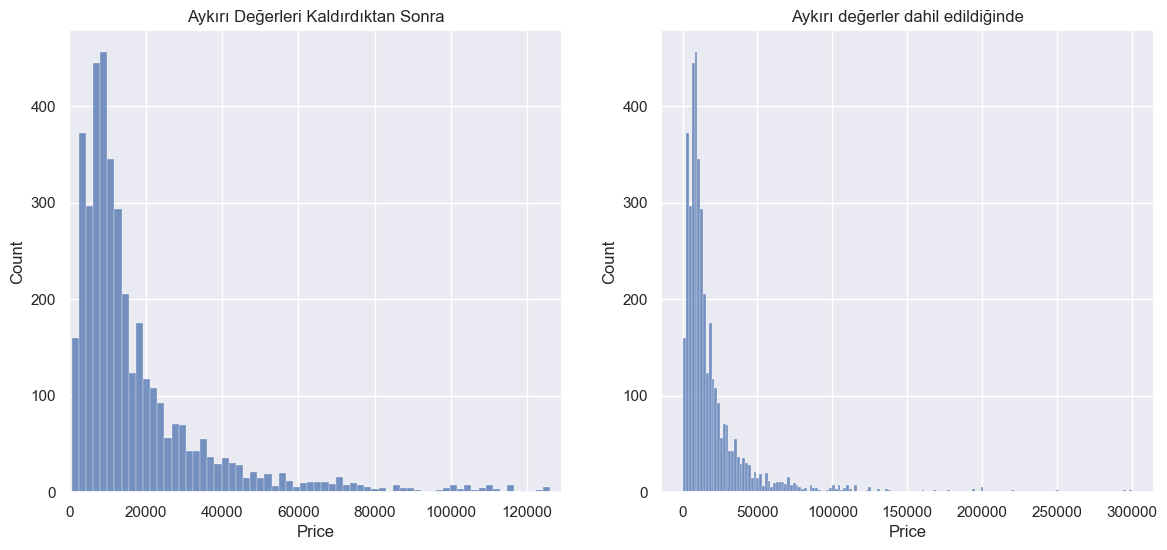

In [12]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(car_raw['Price']) 
plt.title('Aykƒ±rƒ± Deƒüerleri Kaldƒ±rdƒ±ktan Sonra') 
plt.xlim(0,129222)

plt.subplot(1,2,2)
sns.histplot(car_raw['Price']) 
plt.title('Aykƒ±rƒ± deƒüerler dahil edildiƒüinde') 

### 4.2 Aykƒ±rƒ± Deƒüerlerin Analizi

Veri seti i√ßinde yer alan fiyat aralƒ±ƒüƒ±nƒ± kontrol ettiƒüimizde deƒüerlerin bir d√ºzene g√∂re sƒ±ralandƒ±ƒüƒ±nƒ± g√∂r√ºyoruz. Ancak d√ºzene uymayan bazƒ± deƒüerler mevcut. Bunun i√ßin **quantile(0.99)** ile %1'ini kaldƒ±rƒ±yoruz.


In [13]:
q = car_1['Mileage'].quantile(0.99)
car_2 = car_1[car_1['Mileage'] < q]

Burada ger√ßekle≈ütirdiƒüimiz i≈ülem sayesinde ortalamanƒ±n anormal √ºst√ºndeki verilerden kurtulmu≈ü oluyoruz. Benzer i≈ülemler Katedilen mesafe, motor hacmi ve yƒ±l i√ßin de ge√ßerli olabilir.

<Axes: xlabel='Year', ylabel='Count'>

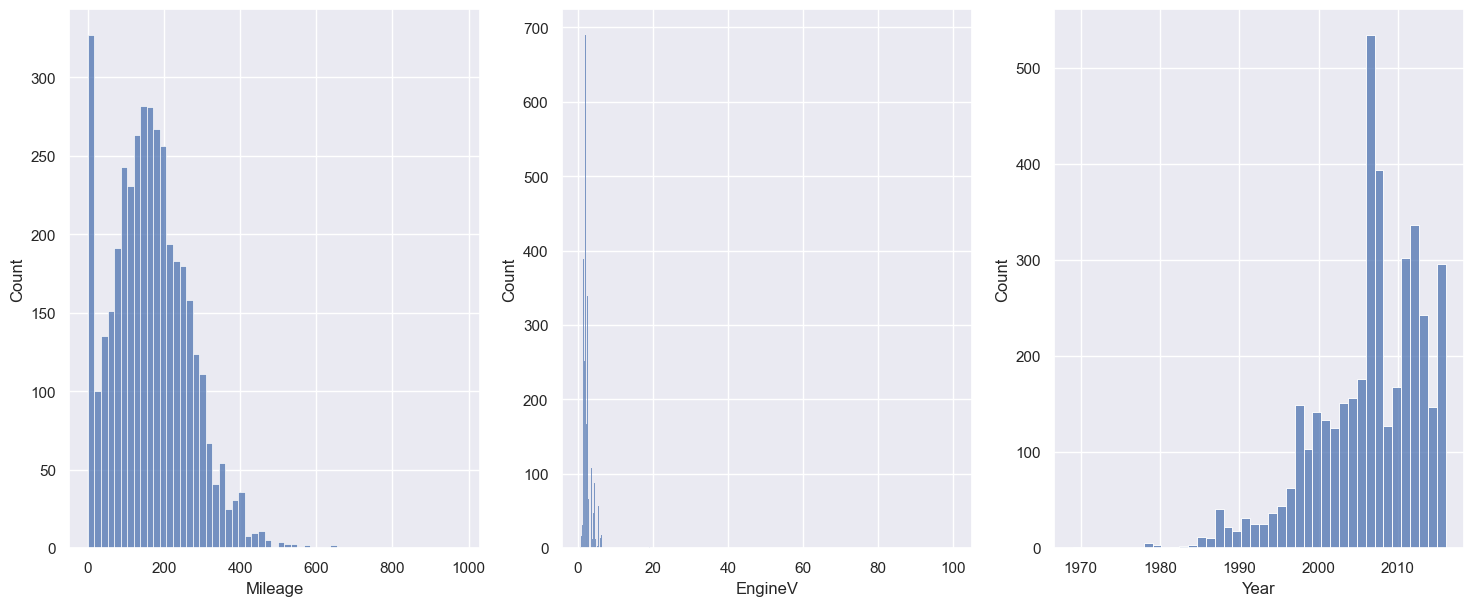

In [14]:
plt.figure(figsize=(18,7))

plt.subplot(1,3,1)
sns.histplot(car_1['Mileage']) 

plt.subplot(1,3,2)
sns.histplot(car_raw['EngineV'])

plt.subplot(1,3,3)
sns.histplot(car_raw['Year']) 

# Bu tespit edilen deƒüerin √ºzerindeki verileri kullanmayƒ± tercih etmiyoruz (aykƒ±rƒ± deƒüerler).

Benzer Problemi burada da g√∂zlemliyoruz. Mesafe ve Motor hacminde ortalamanƒ±n √ßok √ºst√ºnde olanlar ve yƒ±l olarak a≈üƒ±rƒ± eski ara√ßlar veride sapmalara neden oluyor. Benzer √ß√∂z√ºm deneyerek bu sorunu da a≈ümaya √ßalƒ±≈üƒ±yoruz.

### Katedilen Mesafe

In [15]:
q = car_1["Mileage"].quantile(0.99)
car_2 = car_1[car_1["Mileage"] < q]

### 4.3 Diƒüer Deƒüi≈ükenler ƒ∞√ßin Aykƒ±rƒ± Deƒüer Analizi

Burada ger√ßekle≈ütirdiƒüimiz i≈ülem sayesinde ortalamanƒ±n anormal √ºst√ºndeki verilerden kurtulmu≈ü oluyoruz. Benzer i≈ülemler **Katedilen mesafe, motor hacmi ve yƒ±l** i√ßin de ge√ßerli olabilir.


Text(0.5, 1.0, 'Aykƒ±rƒ± Deƒüerleri Kaldƒ±rdƒ±ktan Sonra')

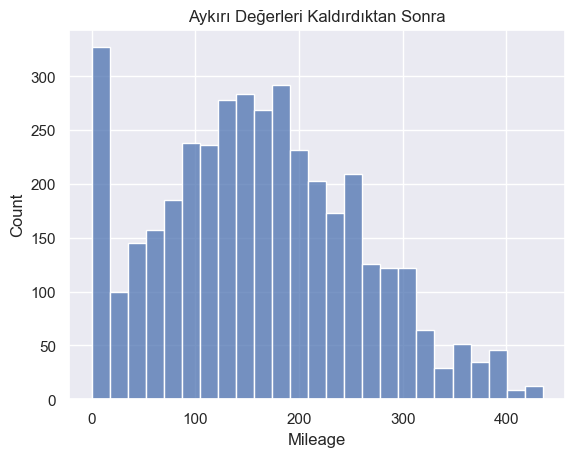

In [16]:
sns.histplot(car_2['Mileage']) 
plt.title('Aykƒ±rƒ± Deƒüerleri Kaldƒ±rdƒ±ktan Sonra') 

### Motor Hacmi

Benzer problemi burada da g√∂zlemliyoruz:
- **Mesafe**: Ortalamanƒ±n √ßok √ºst√ºnde deƒüerler
- **Motor hacmi**: A≈üƒ±rƒ± y√ºksek motor hacimleri
- **Yƒ±l**: A≈üƒ±rƒ± eski ara√ßlar

Bu sapmalara neden olan deƒüerleri temizleyeceƒüiz.


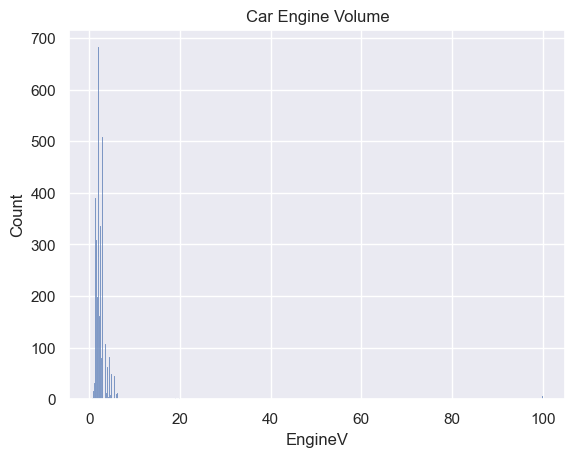

In [17]:
sns.histplot(car_2['EngineV']) 
plt.title('Car Engine Volume') 

print('Benzer problemi burada da g√∂zlemliyoruz:')
print('- **Mesafe**: Ortalamanƒ±n √ßok √ºst√ºnde deƒüerler')
print('- **Motor hacmi**: A≈üƒ±rƒ± y√ºksek motor hacimleri')
print('- **Yƒ±l**: A≈üƒ±rƒ± eski ara√ßlar\n')
print('Bu sapmalara neden olan deƒüerleri temizleyeceƒüiz.')

Text(0.5, 1.0, 'Mantƒ±klƒ± aralƒ±kta motor hacim deƒüerleri')

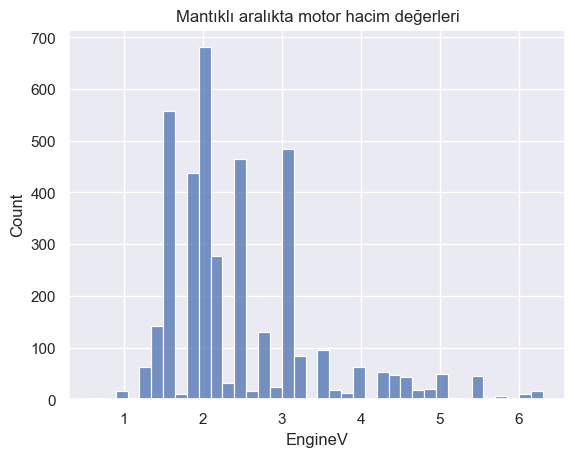

In [18]:
car_3 = car_2[car_2['EngineV']<6.5]
sns.histplot(car_3['EngineV'])
plt.title('Mantƒ±klƒ± aralƒ±kta motor hacim deƒüerleri')

### 4.4 Kilometre (Mileage) Aykƒ±rƒ± Deƒüerlerinin Temizlenmesi

### Yƒ±l

Text(0.5, 1.0, 'Yƒ±l')

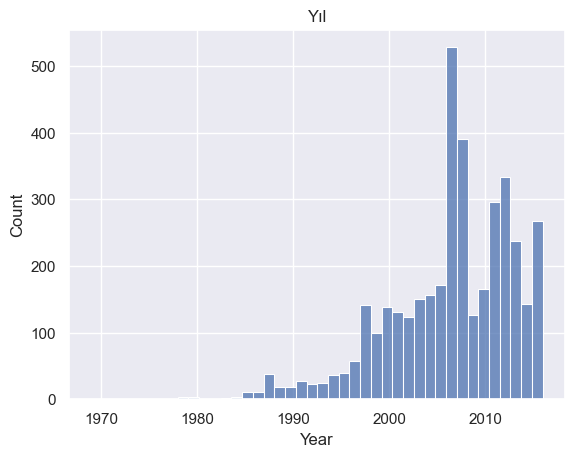

In [19]:
sns.histplot(car_3['Year']) 
plt.title('Yƒ±l') 

Text(0.5, 1.0, 'Eski yƒ±llarƒ± sildikten sonra Yƒ±l Deƒüerleri')

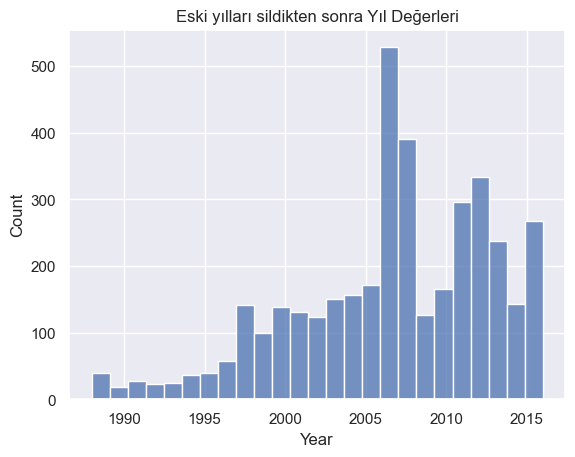

In [20]:
q = car_3['Year'].quantile(0.01)
car_4 = car_3[car_3['Year']>q]

sns.histplot(car_4['Year'])
plt.title('Eski yƒ±llarƒ± sildikten sonra Yƒ±l Deƒüerleri')

### 4.5 Motor Hacmi (Engine Volume) Aykƒ±rƒ± Deƒüerlerinin Temizlenmesi

In [21]:
car_4

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4338     Volkswagen   11500.0        van      163      2.5      Diesel   
4339         Toyota   17900.0      sedan       35      1.6      Petrol   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  
0             yes  1991  
1             yes  1999  
2             yes  2003  
3             yes  2007  
4             yes  2011  
...           ...   ...  
4338          yes  2008  
4339          yes  2014  
4340          yes  2014  
4341          yes  1999  
4344          yes  2013  

[3867 rows x 8 columns]

yaptƒ±ƒüƒ±mƒ±z i≈ülemler sonucunda indexlerde kaymalar ya≈üandƒ±. veri setinde 3867 veri bulunurken 4344 index yer alƒ±yor.

In [22]:
car_clean = car_4.reset_index(drop=True)

car_clean

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
3862     Volkswagen   11500.0        van      163      2.5      Diesel   
3863         Toyota   17900.0      sedan       35      1.6      Petrol   
3864  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
3865            BMW    6500.0      sedan        1      3.5      Petrol   
3866     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  
0             yes  1991  
1             yes  1999  
2             yes  2003  
3             yes  2007  
4             yes  2011  
...           ...   ...  
3862          yes  2008  
3863          yes  2014  
3864          yes  2014  
3865          yes  1999  
3866          yes  2013  

[3867 rows x 8 columns]

### 4.6 Yƒ±l (Year) Aykƒ±rƒ± Deƒüerlerinin Temizlenmesi

In [23]:
car_clean.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3867    3867.000000   3867  3867.000000  3867.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           848            NaN   1467          NaN          NaN   
mean           NaN   18194.455679    NaN   160.542539     2.450440   
std            NaN   19085.855165    NaN    95.633291     0.949366   
min            NaN     800.000000    NaN     0.000000     0.600000   
25%            NaN    7200.000000    NaN    91.000000     1.800000   
50%            NaN   11700.000000    NaN   157.000000     2.200000   
75%            NaN   21700.000000    NaN   225.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     6.300000   

       Engine Type Registration         Year  
count         3867         3867  3867.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1807         3505          NaN  
mean           NaN          NaN  2006.709853  
std            NaN          NaN     6.103870  
min            NaN          NaN  1988.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

In [24]:
car_raw.shape[0] -  car_clean.shape[0]

158

veri setinin ilk hali ile temizlenmi≈ü hali arasƒ±nda ba≈üta sildiƒüimiz null deƒüerler haricinde 158 veri daha kaldƒ±rmƒ±≈üƒ±z.
silinen 172 null verisini de dahil edersek toplam 330 adet datayƒ± kaybettik

In [25]:
car_clean.to_csv('Car_cleaned.csv', index=False)

### 4.7 Veri Seti ƒ∞ndekslerinin D√ºzenlenmesi

Yaptƒ±ƒüƒ±mƒ±z temizlik i≈ülemleri sonucunda indexlerde kaymalar ya≈üandƒ±. Veri setinde **3867 veri** bulunurken **4344 index** yer alƒ±yor. Bu durumu d√ºzeltelim.

Temizlenmi≈ü veri setini kaydetiyoruz.

Temizlik i≈ülemleri sonrasƒ±nda dahmin i√ßin √∂ncelikle Lineer Regresyon kullanmayƒ± deniyoruz.

Lineer Regresyonun amacƒ± iki deƒüi≈üken arasƒ±ndaki ili≈ükinin doƒürusal olup olmadƒ±ƒüƒ±nƒ± tahmin etmektir.

In [26]:
car = pd.read_csv('Car_cleaned.csv')
car.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year  
0          yes  1991  
1          yes  1999  
2          yes  2003  
3          yes  2007  
4          yes  2011

numerik 3 s√ºtunu inceleyelim

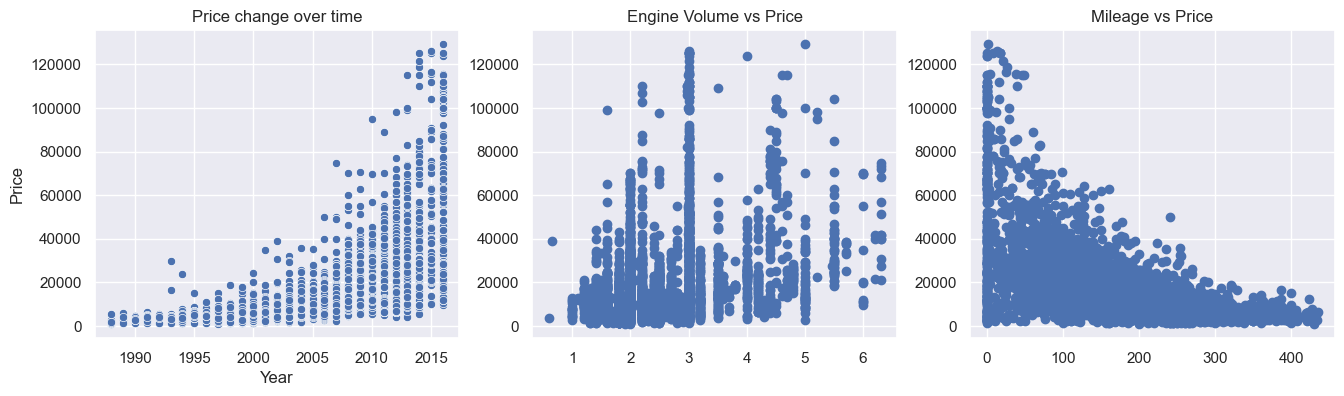

In [27]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.scatterplot(x=car["Year"], y=car["Price"])
plt.title("Price change over time")
plt.subplot(1,3,2)
plt.scatter(x=car["EngineV"], y=car["Price"])
plt.title("Engine Volume vs Price")
plt.subplot(1,3,3)
plt.scatter(x=car["Mileage"], y=car["Price"])
plt.title("Mileage vs Price")
plt.show()

### 4.8 Temizlik ƒ∞≈ülemi Sonu√ß Analizi

üìà **Veri Kaybƒ± Analizi:**
- Aykƒ±rƒ± deƒüer temizliƒüi: **158 veri**
- Null deƒüer temizliƒüi: **172 veri**
- **Toplam kayƒ±p**: 330 veri

Bu kayƒ±p, veri kalitesini artƒ±rmak i√ßin kabul edilebilir d√ºzeydedir.

ili≈üki doƒürusal olmadƒ±ƒüƒ±nƒ± g√∂zlemledik. Bu y√ºzden Lineer Regresyon kullanƒ±mƒ±na uygun olmadƒ±ƒüƒ±nƒ± tespit ediyoruz

Text(0.5, 1.0, 'Price')

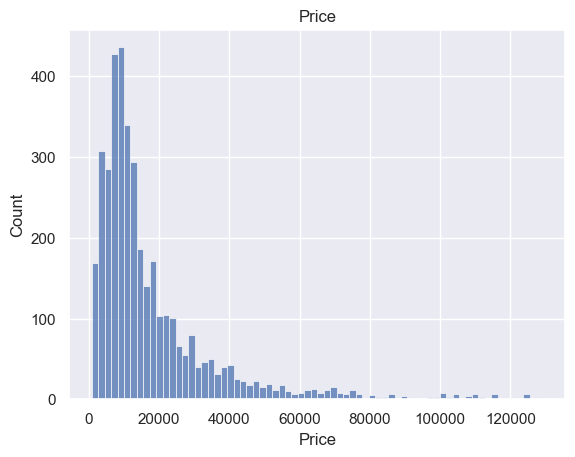

In [28]:
sns.histplot(car['Price']) 
plt.title('Price')

Burda temel sorun fiyat parametresinden kaynaklanƒ±yor. Sahip olduƒüumuz fiyat verisi doƒürusal deƒüil.

Veriyi d√∂n√º≈üt√ºrmek i√ßin log d√∂n√º≈ü√ºm√º deniyoruz

## ü§ñ 5. Model Geli≈ütirme - Linear Regression

### 5.1 Linear Regression Yakla≈üƒ±mƒ±

Temizlik i≈ülemleri sonrasƒ±nda tahmin i√ßin √∂ncelikle **Linear Regression** kullanmayƒ± deniyoruz.

**Linear Regression'ƒ±n Amacƒ±**: ƒ∞ki deƒüi≈üken arasƒ±ndaki ili≈ükinin doƒürusal olup olmadƒ±ƒüƒ±nƒ± tahmin etmektir.

In [29]:
log_price = np.log(car['Price'])
car['log_price'] = log_price

car.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year  log_price  
0          yes  1991   8.342840  
1          yes  1999   8.974618  
2          yes  2003   9.495519  
3          yes  2007  10.043249  
4          yes  2011   9.814656

### 5.2 Numerik Deƒüi≈ükenlerin ƒ∞ncelenmesi

3 ana numerik s√ºtunu inceleyelim ve fiyatla olan ili≈ükilerini g√∂relim.

Text(0.5, 1.0, 'Mileage Vs log_price')

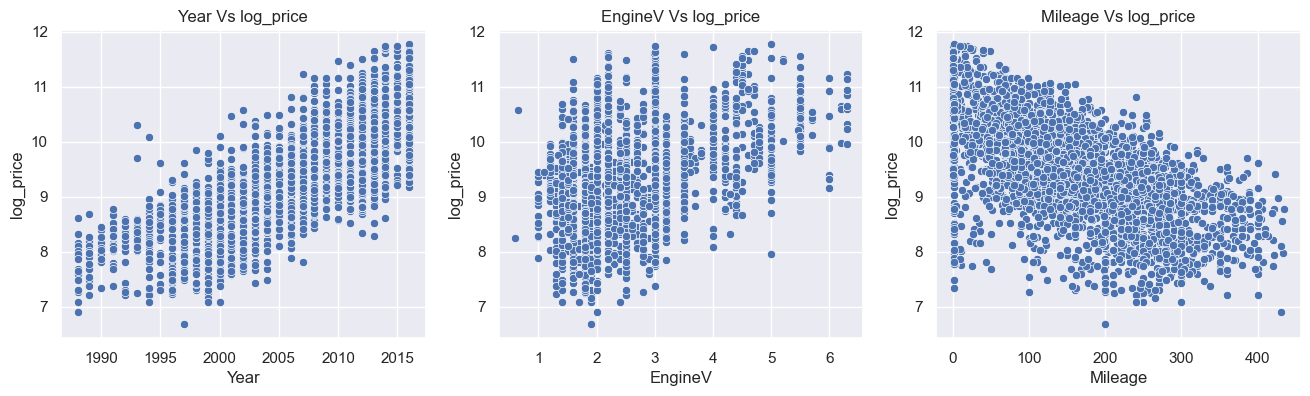

In [30]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.scatterplot(x=car['Year'], y=car['log_price']) 
plt.title('Year Vs log_price') 

plt.subplot(1,3,2)
sns.scatterplot(x=car['EngineV'], y=car['log_price']) 
plt.title('EngineV Vs log_price') 

plt.subplot(1,3,3)
sns.scatterplot(x=car['Mileage'], y=car['log_price']) 
plt.title('Mileage Vs log_price') 

log d√∂n√º≈ü√ºm√º sonrasƒ± verilerin doƒürusallƒ±ƒüƒ±nƒ± g√∂zlemleyebiliyoruz.

In [31]:
car.drop('Price', axis=1, inplace=True)

### 5.3 Doƒürusallƒ±k Analizi Sonucu

‚ùå **Sonu√ß**: ƒ∞li≈üki doƒürusal olmadƒ±ƒüƒ±nƒ± g√∂zlemledik. Bu y√ºzden Linear Regression kullanƒ±mƒ±na **uygun olmadƒ±ƒüƒ±nƒ±** tespit ediyoruz.

orijinal fiyat tablosuna ihtiyacƒ±mƒ±z kalmadƒ±ƒüƒ± i√ßin kaldƒ±rabiliriz.

≈ûimdi sƒ±ra √ßoklu doƒürusallƒ±ƒüƒ± kontrol etmeye geldi

### 5.4 Veri D√∂n√º≈ü√ºm√º - Log Transformation

Burada temel sorun **fiyat parametresinden** kaynaklanƒ±yor. Sahip olduƒüumuz fiyat verisi doƒürusal deƒüil.

**√á√∂z√ºm**: Veriyi d√∂n√º≈üt√ºrmek i√ßin **log d√∂n√º≈ü√ºm√º** deniyoruz.

In [32]:
car.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'],
      dtype='object')

Burada, arabanƒ±n daha yeni olmasƒ± kilometre deƒüerinin daha d√º≈ü√ºk olacaƒüƒ± gibi varsayƒ±labilecek verilerde bazƒ± √ßoklu doƒürusallƒ±k olabilir. bu nedenle Yƒ±l ve Kilometre birbiriyle ili≈ükili olacaktƒ±r

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

var = car[['Mileage','Year', 'EngineV']]
vif_df = pd.DataFrame()

vif_df['VIF'] = [vif(var.values, i) for i in range(var.shape[1])]
vif_df['Features'] = var.columns
vif_df

VIF Features
0   3.791584  Mileage
1  10.354854     Year
2   7.662068  EngineV

### 5.5 Log D√∂n√º≈ü√ºm√º Sonucu

‚úÖ **Ba≈üarƒ±lƒ±!** Log d√∂n√º≈ü√ºm√º sonrasƒ± verilerin **doƒürusallƒ±ƒüƒ±nƒ±** g√∂zlemleyebiliyoruz.

Sonu√ß 1 olduƒüunda, bu √ßoklu baƒülantƒ± bulunmadƒ±ƒüƒ± anlamƒ±na gelir, bu aynƒ± zamanda √∂l√ß√ºn√ºn minimum deƒüeridir. ancak bunun bir √ºst sƒ±nƒ±rƒ± yoktur.

Genel olarak deƒüerler 1 ila 5 arasƒ±nda veya 1 < VIF < 5 arasƒ±nda kabul edilebilir olmakla birlikte, mevcut soruna ve yazƒ±lƒ±mcƒ±ya baƒülƒ±dƒ±r. ge√ßmi≈ü deneyimlerinden yola √ßƒ±karak kesme deƒüerine karar verecektir

Elde ettiƒüimiz sonu√ßa g√∂re, Yƒ±l s√ºtunu diƒüer s√ºtunlarla √ßok fazla ili≈ükili gibi g√∂r√ºn√ºyor. ve diƒüer √∂zellik deƒüerlerini de etkilemektedir. yƒ±l deƒüerini √ßƒ±karmak iyi olabilir.

In [34]:
car.drop('Year', axis=1, inplace=True)
car.head()

Brand       Body  Mileage  EngineV Engine Type Registration  \
0            BMW      sedan      277      2.0      Petrol          yes   
1  Mercedes-Benz        van      427      2.9      Diesel          yes   
2  Mercedes-Benz      sedan      358      5.0         Gas          yes   
3           Audi  crossover      240      4.2      Petrol          yes   
4         Toyota  crossover      120      2.0      Petrol          yes   

   log_price  
0   8.342840  
1   8.974618  
2   9.495519  
3  10.043249  
4   9.814656

Sƒ±ra kategorik s√ºtunlara geliyor

### 5.6 √áoklu Doƒürusallƒ±k (Multicollinearity) Kontrol√º

In [35]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3867 non-null   object 
 1   Body          3867 non-null   object 
 2   Mileage       3867 non-null   int64  
 3   EngineV       3867 non-null   float64
 4   Engine Type   3867 non-null   object 
 5   Registration  3867 non-null   object 
 6   log_price     3867 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 211.6+ KB


Bunun i√ßin pandas .get_dummies() metodunu tercih ediyoruz, t√ºm kategorik deƒüerler i√ßin yeni bir s√ºtun olu≈üturacak, verilerin boyutunu artƒ±racaktƒ±r.

**Beklenen ƒ∞li≈ükiler:**
- Arabanƒ±n daha **yeni** olmasƒ± ‚Üí **kilometre** deƒüerinin daha d√º≈ü√ºk olmasƒ±
- Bu nedenle **Yƒ±l** ve **Kilometre** birbiriyle ili≈ükili olacaktƒ±r

**VIF (Variance Inflation Factor)** ile kontrol edelim.

In [36]:
car_dum = pd.get_dummies(car, drop_first=True)
car_dum = car_dum.astype(float)
car_dum

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0       277.0      2.0   8.342840        1.0                  0.0   
1       427.0      2.9   8.974618        0.0                  1.0   
2       358.0      5.0   9.495519        0.0                  1.0   
3       240.0      4.2  10.043249        0.0                  0.0   
4       120.0      2.0   9.814656        0.0                  0.0   
...       ...      ...        ...        ...                  ...   
3862    163.0      2.5   9.350102        0.0                  0.0   
3863     35.0      1.6   9.792556        0.0                  0.0   
3864      9.0      3.0  11.736069        0.0                  1.0   
3865      1.0      3.5   8.779557        1.0                  0.0   
3866    124.0      2.0   9.510445        0.0                  0.0   

      Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                  0.0            0.0           0.0               0.0   
1                  0.0            0.0           0.0               0.0   
2                  0.0            0.0           0.0               0.0   
3                  0.0            0.0           0.0               0.0   
4                  0.0            0.0           1.0               0.0   
...                ...            ...           ...               ...   
3862               0.0            0.0           0.0               1.0   
3863               0.0            0.0           1.0               0.0   
3864               0.0            0.0           0.0               0.0   
3865               0.0            0.0           0.0               0.0   
3866               0.0            0.0           0.0               1.0   

      Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  \
0            0.0         0.0         1.0         0.0       0.0   
1            0.0         0.0         0.0         0.0       1.0   
2            0.0         0.0         1.0         0.0       0.0   
3            0.0         0.0         0.0         0.0       0.0   
4            0.0         0.0         0.0         0.0       0.0   
...          ...         ...         ...         ...       ...   
3862         0.0         0.0         0.0         0.0       1.0   
3863         0.0         0.0         1.0         0.0       0.0   
3864         0.0         0.0         1.0         0.0       0.0   
3865         0.0         0.0         1.0         0.0       0.0   
3866         0.0         0.0         0.0         0.0       1.0   

      Engine Type_Gas  Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                 0.0                0.0                 1.0               1.0  
1                 0.0                0.0                 0.0               1.0  
2                 1.0                0.0                 0.0               1.0  
3                 0.0                0.0                 1.0               1.0  
4                 0.0                0.0                 1.0               1.0  
...               ...                ...                 ...               ...  
3862              0.0                0.0                 0.0               1.0  
3863              0.0                0.0                 1.0               1.0  
3864              0.0                0.0                 0.0               1.0  
3865              0.0                0.0                 1.0               1.0  
3866              0.0                0.0                 0.0               1.0  

[3867 rows x 18 columns]

√áoklu baƒülantƒ± durumu kontrol

### 5.7 VIF Analiz Sonu√ßlarƒ±

**VIF Deƒüer Yorumlarƒ±:**
- **VIF = 1**: √áoklu baƒülantƒ± yok (minimum deƒüer)
- **1 < VIF < 5**: Kabul edilebilir
- **VIF > 5**: √áoklu baƒülantƒ± sorunu

**Sonu√ß**: Yƒ±l s√ºtunu diƒüer s√ºtunlarla √ßok fazla ili≈ükili g√∂r√ºn√ºyor ve diƒüer √∂zellik deƒüerlerini etkilemektedir. **Yƒ±l deƒüerini √ßƒ±karmak** iyi olabilir.

In [37]:
vif_df_all = pd.DataFrame()

vif_df_all['VIF'] = [vif(car_dum.values, i) for i in range(car_dum.shape[1])]
vif_df_all['Features'] = car_dum.columns

vif_df_all

VIF             Features
0    4.460434              Mileage
1   13.445639              EngineV
2   41.981260            log_price
3    2.603990            Brand_BMW
4    3.084356  Brand_Mercedes-Benz
5    1.830297     Brand_Mitsubishi
6    2.281498        Brand_Renault
7    2.406546         Brand_Toyota
8    3.312814     Brand_Volkswagen
9    1.583516           Body_hatch
10   1.597487           Body_other
11   3.455354           Body_sedan
12   1.810633           Body_vagon
13   2.579105             Body_van
14   1.711589      Engine Type_Gas
15   1.082223    Engine Type_Other
16   2.506715   Engine Type_Petrol
17  15.167906     Registration_yes

Elde ettiƒüimiz sonu√ß olumlu. t√ºm deƒüerler 5'in altƒ±nda ancak log_price yani hedef s√ºtunumuz 42 VIF deƒüerine sahip, bu da bize fiyatƒ±n diƒüer s√ºtunlarla y√ºksek oranda ili≈ükili olduƒüunu s√∂yl√ºyor

### 5.8 Kategorik Deƒüi≈ükenlerin ƒ∞≈ülenmesi

In [38]:
car_dum.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [39]:
col = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

car_pos = car_dum[col]
car_pos

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0      8.342840    277.0      2.0        1.0                  0.0   
1      8.974618    427.0      2.9        0.0                  1.0   
2      9.495519    358.0      5.0        0.0                  1.0   
3     10.043249    240.0      4.2        0.0                  0.0   
4      9.814656    120.0      2.0        0.0                  0.0   
...         ...      ...      ...        ...                  ...   
3862   9.350102    163.0      2.5        0.0                  0.0   
3863   9.792556     35.0      1.6        0.0                  0.0   
3864  11.736069      9.0      3.0        0.0                  1.0   
3865   8.779557      1.0      3.5        1.0                  0.0   
3866   9.510445    124.0      2.0        0.0                  0.0   

      Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                  0.0            0.0           0.0               0.0   
1                  0.0            0.0           0.0               0.0   
2                  0.0            0.0           0.0               0.0   
3                  0.0            0.0           0.0               0.0   
4                  0.0            0.0           1.0               0.0   
...                ...            ...           ...               ...   
3862               0.0            0.0           0.0               1.0   
3863               0.0            0.0           1.0               0.0   
3864               0.0            0.0           0.0               0.0   
3865               0.0            0.0           0.0               0.0   
3866               0.0            0.0           0.0               1.0   

      Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  \
0            0.0         0.0         1.0         0.0       0.0   
1            0.0         0.0         0.0         0.0       1.0   
2            0.0         0.0         1.0         0.0       0.0   
3            0.0         0.0         0.0         0.0       0.0   
4            0.0         0.0         0.0         0.0       0.0   
...          ...         ...         ...         ...       ...   
3862         0.0         0.0         0.0         0.0       1.0   
3863         0.0         0.0         1.0         0.0       0.0   
3864         0.0         0.0         1.0         0.0       0.0   
3865         0.0         0.0         1.0         0.0       0.0   
3866         0.0         0.0         0.0         0.0       1.0   

      Engine Type_Gas  Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                 0.0                0.0                 1.0               1.0  
1                 0.0                0.0                 0.0               1.0  
2                 1.0                0.0                 0.0               1.0  
3                 0.0                0.0                 1.0               1.0  
4                 0.0                0.0                 1.0               1.0  
...               ...                ...                 ...               ...  
3862              0.0                0.0                 0.0               1.0  
3863              0.0                0.0                 1.0               1.0  
3864              0.0                0.0                 0.0               1.0  
3865              0.0                0.0                 1.0               1.0  
3866              0.0                0.0                 0.0               1.0  

[3867 rows x 18 columns]

**Pandas get_dummies() Metodu:**
- T√ºm kategorik deƒüerler i√ßin yeni s√ºtun olu≈üturacak
- Verilerin boyutunu artƒ±racak
- Her kategori i√ßin 0/1 deƒüerleri i√ßerecek

In [40]:
car_pos.to_csv('Car_preproccesed.csv', index=False)
print('Data Saved')

Data Saved


### 5.11 √ñn ƒ∞≈ülenmi≈ü Verinin Kaydedilmesi

Linear Regression i√ßin hazƒ±rlanmƒ±≈ü veriyi kaydediyoruz.

In [41]:
car = pd.read_csv('Car_preproccesed.csv')
car.head()

### 5.9 Final √áoklu Baƒülantƒ± Durumu Kontrol√º

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840    277.0      2.0        1.0                  0.0   
1   8.974618    427.0      2.9        0.0                  1.0   
2   9.495519    358.0      5.0        0.0                  1.0   
3  10.043249    240.0      4.2        0.0                  0.0   
4   9.814656    120.0      2.0        0.0                  0.0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0               0.0            0.0           0.0               0.0   
1               0.0            0.0           0.0               0.0   
2               0.0            0.0           0.0               0.0   
3               0.0            0.0           0.0               0.0   
4               0.0            0.0           1.0               0.0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0         0.0         0.0         1.0         0.0       0.0              0.0   
1         0.0         0.0         0.0         0.0       1.0              0.0   
2         0.0         0.0         1.0         0.0       0.0              1.0   
3         0.0         0.0         0.0         0.0       0.0              0.0   
4         0.0         0.0         0.0         0.0       0.0              0.0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                0.0                 1.0               1.0  
1                0.0                 0.0               1.0  
2                0.0                 0.0               1.0  
3                0.0                 1.0               1.0  
4                0.0                 1.0               1.0

# **Linear Reg**

In [42]:
X = car.drop('log_price', axis=1)
y = car['log_price']

X.shape, y.shape

((3867, 17), (3867,))


### 5.10 VIF Sonu√ßlarƒ± - Final

‚úÖ **Olumlu Sonu√ß**: T√ºm deƒüerler 5'in altƒ±nda

‚ö†Ô∏è **Not**: log_price (hedef s√ºtun) **42 VIF** deƒüerine sahip. Bu bize fiyatƒ±n diƒüer s√ºtunlarla **y√ºksek oranda ili≈ükili** olduƒüunu s√∂yl√ºyor (bu normal ve beklenen bir durum).

Verilerin √∂l√ßeklendirilmesi
Not: Dummy variable'ƒ± √∂l√ßeklendirmek her zaman en iyi uygulama olarak kabul edilmez. √á√ºnk√º √∂l√ßeklendirildiklerinde t√ºm bilgileri kaybederler. ancak burada bunu g√∂z ardƒ± ediyoruz ve her s√ºtunun ayrƒ± √∂zellikler olduƒüunu d√º≈ü√ºn√ºyoruz.

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [44]:
X_scaled[0]

array([ 1.2179077 , -0.47452478,  2.27971827, -0.49255381, -0.29105409,
       -0.35463247, -0.38447151, -0.52998841, -0.26458559, -0.32527677,
        1.27905896, -0.32624802, -0.43276889, -0.41493781, -0.16209221,
        1.33267512,  0.32137366])

Dummy deƒüerlerde yer alan 1 ve 0'lar artƒ±k yok

#### Train_test_split

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

## üéØ 6. Linear Regression Model Eƒüitimi

### 6.1 Veri Hazƒ±rlƒ±ƒüƒ±

((3093, 17), (3093,), (774, 17), (774,))

#### Regresyon olu≈üturma

In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### 6.2 Veri √ñl√ßeklendirme (Feature Scaling)

**‚ö†Ô∏è Not**: Dummy variable'larƒ± √∂l√ßeklendirmek her zaman en iyi uygulama olarak kabul edilmez. √á√ºnk√º √∂l√ßeklendirildiklerinde t√ºm bilgileri kaybederler. Ancak burada bunu g√∂z ardƒ± ediyoruz ve her s√ºtunun ayrƒ± √∂zellikler olduƒüunu d√º≈ü√ºn√ºyoruz.

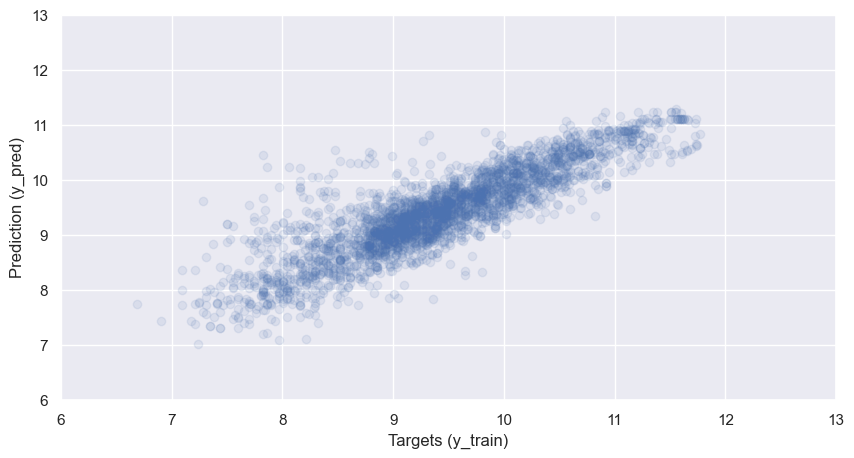

In [47]:
# Temel Lineer regresyon modelininin deƒüerlendirmesi
y_pred_train = lr.predict(X_train)
plt.figure(figsize=(10,5))
plt.scatter(y_train, y_pred_train, alpha=0.1)
plt.xlabel('Targets (y_train)')
plt.ylabel('Prediction (y_pred)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Eƒüitim tahmini iyi g√∂r√ºn√ºyor, tamamen rastgele deƒüil, grafikte doƒürusallƒ±ƒüƒ± g√∂zlemlenebiliyor

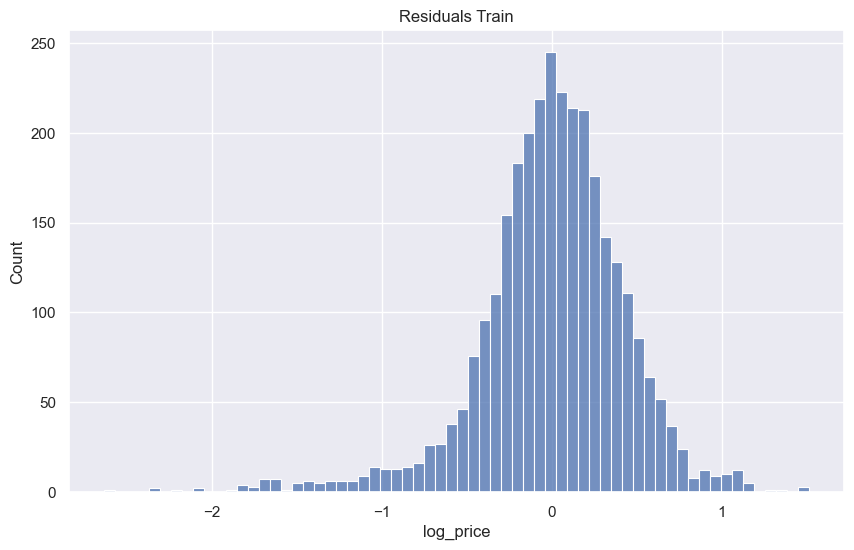

In [48]:
residuals_train = (y_train - y_pred_train)

plt.figure(figsize=(10,6))
sns.histplot(residuals_train)
plt.title('Residuals Train')
plt.show()

**√ñl√ßeklendirme Sonucu**: Dummy deƒüerlerde yer alan 1 ve 0'lar artƒ±k standart daƒüƒ±lƒ±ma uygun deƒüerler aldƒ±.

### 6.3 Eƒüitim-Test Verisi Ayrƒ±mƒ±

Bu grafikten, ortalama 0 olduƒüu i√ßin deƒüerlerin √ßoƒüunun 0'a yakƒ±n olduƒüu g√∂zlemlenebilir, bu da modelin daha iyi √ßalƒ±≈ütƒ±ƒüƒ± anlamƒ±na gelir, √ß√ºnk√º farkƒ±n √ßoƒüu 0'dƒ±r, model hedef deƒüer √ºzerinde olduƒüu i√ßin tahmin yapar.

In [49]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.7572893585761237

In [50]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_train)))

### 6.4 Linear Regression Modelinin Olu≈üturulmasƒ±

10165.941028678855

Veri setinde minimum ve maksimum fiyat 800 ve 129222 idi ve modelimiz 10165 hata yapƒ±yor.

Olu≈üturduƒüum model m√ºkemmel deƒüil ama o kadar da k√∂t√º deƒüil.

In [51]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = lr.coef_
reg_summary

Features   Weights
0               Mileage -0.462515
1               EngineV  0.213625
2             Brand_BMW  0.025071
3   Brand_Mercedes-Benz  0.023430
4      Brand_Mitsubishi -0.128286
5         Brand_Renault -0.174282
6          Brand_Toyota -0.048213
7      Brand_Volkswagen -0.077236
8            Body_hatch -0.147790
9            Body_other -0.103041
10           Body_sedan -0.199875
11           Body_vagon -0.114890
12             Body_van -0.163634
13      Engine Type_Gas -0.119878
14    Engine Type_Other -0.029663
15   Engine Type_Petrol -0.145282
16     Registration_yes  0.317635

positive_weights = √∂zellik deƒüeri arttƒ±k√ßa fiyat da artacaktƒ±r.

negatif_aƒüƒ±rlƒ±klar = √∂zellik deƒüeri artar ancak fiyat d√º≈üer

### 6.5 Eƒüitim Sonu√ßlarƒ± Deƒüerlendirmesi

‚úÖ **Eƒüitim tahmini iyi g√∂r√ºn√ºyor:**
- Tamamen rastgele deƒüil
- Grafikte doƒürusallƒ±k g√∂zlemlenebiliyor

### Test Verilerinin Deƒüerlendirmesi

Text(0, 0.5, 'Prediction (y_pred)')

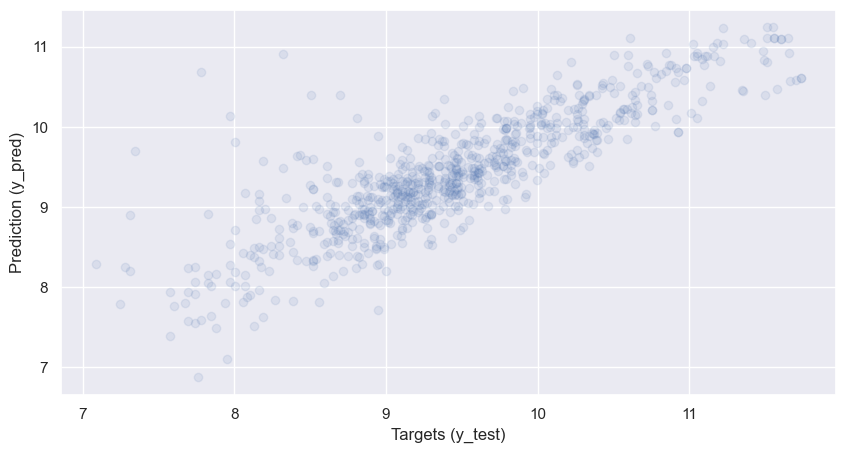

In [52]:
y_pred = lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.1)
plt.xlabel('Targets (y_test)')
plt.ylabel('Prediction (y_pred)')

### 6.6 Residual (Hata) Analizi

**Grafik Yorumu:**
- Ortalama **0** olduƒüu i√ßin deƒüerlerin √ßoƒüu 0'a yakƒ±n
- Bu modelin **daha iyi √ßalƒ±≈ütƒ±ƒüƒ±** anlamƒ±na gelir
- Farkƒ±n √ßoƒüu 0 olduƒüu i√ßin model hedef deƒüer √ºzerinde **doƒüru tahmin** yapar

In [53]:
np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

11692.288211748422

Test verilerinde 11692 hata yapƒ±yor, bu da modelin o kadar iyi performans g√∂steremeyebileceƒüini, ancak deneme ve test verilerinde aynƒ± ≈üekilde davrandƒ±ƒüƒ± i√ßin a≈üƒ±rƒ± uyum g√∂stermediƒüini s√∂yl√ºyor

In [54]:
df_eval = pd.DataFrame(np.exp(y_pred), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_eval['Target'] = np.exp(y_test)
df_eval

Prediction    Target
0    18328.250265   19000.0
1     5256.283391    5500.0
2    22185.025441   19200.0
3    10102.190466   11900.0
4     4000.490570    7750.0
..            ...       ...
769  39166.491984  116500.0
770   6060.759191   13200.0
771  15649.805091   27500.0
772  11164.302749   16500.0
773  11114.913153   11900.0

[774 rows x 2 columns]

### 6.7 Model Performans Deƒüerlendirmesi

üìä **Performans Metrikleri:**
- **Veri seti fiyat aralƒ±ƒüƒ±**: 800 - 129,222
- **Model hatasƒ± (RMSE)**: 10,165
- **Sonu√ß**: Model m√ºkemmel deƒüil ama o kadar da k√∂t√º deƒüil

In [55]:
df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual']/df_eval['Target']*100)

df_eval

Prediction    Target      Residual  Difference%
0    18328.250265   19000.0    671.749735     3.535525
1     5256.283391    5500.0    243.716609     4.431211
2    22185.025441   19200.0  -2985.025441    15.547008
3    10102.190466   11900.0   1797.809534    15.107643
4     4000.490570    7750.0   3749.509430    48.380767
..            ...       ...           ...          ...
769  39166.491984  116500.0  77333.508016    66.380694
770   6060.759191   13200.0   7139.240809    54.085158
771  15649.805091   27500.0  11850.194909    43.091618
772  11164.302749   16500.0   5335.697251    32.337559
773  11114.913153   11900.0    785.086847     6.597368

[774 rows x 4 columns]

In [56]:
df_eval.describe()

Prediction         Target      Residual  Difference%
count    774.000000     774.000000    774.000000   774.000000
mean   16194.846830   18602.017829   2407.171000    39.109058
std    13265.843148   20139.559184  11449.213563    97.373331
min      964.002758    1200.000000 -50811.547159     0.101011
25%     7763.585673    7500.000000  -1827.305347    11.626478
50%    11715.376533   11900.000000    499.370435    22.999212
75%    20275.681146   20999.060000   3512.480615    39.073044
max    76339.579559  125000.000000  84484.674575  1715.173190

### 6.8 √ñzellik Aƒüƒ±rlƒ±klarƒ± (Feature Weights) Analizi

**Aƒüƒ±rlƒ±k Yorumlarƒ±:**
- **Pozitif aƒüƒ±rlƒ±klar**: √ñzellik deƒüeri arttƒ±k√ßa fiyat da artar
- **Negatif aƒüƒ±rlƒ±klar**: √ñzellik deƒüeri artar ancak fiyat d√º≈üer

In [57]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_eval.sort_values(by=['Difference%'])

Prediction    Target  Residual  Difference%
411    22477.27  22500.00     22.73         0.10
633    12913.53  12900.00    -13.53         0.10
437    10818.26  10800.00    -18.26         0.17
522    23245.83  23200.00    -45.83         0.20
91     11525.19  11500.00    -25.19         0.22
589     7028.32   6999.00    -29.32         0.42
664    61761.13  61500.00   -261.13         0.42
446     9252.34   9200.00    -52.34         0.57
322     9239.70   9300.00     60.30         0.65
119    14901.42  15000.00     98.58         0.66
557    18459.94  18600.00    140.06         0.75
422    10119.62  10200.00     80.38         0.79
419    25105.04  24900.00   -205.04         0.82
707     9789.14   9700.00    -89.14         0.92
734    29224.93  29500.00    275.07         0.93
166     8717.87   8800.00     82.13         0.93
539     3028.12   3000.00    -28.12         0.94
542    32720.33  32400.00   -320.33         0.99
300     9803.45   9700.00   -103.45         1.07
171    16679.68  16500.00   -179.68         1.09
304    27171.31  26850.00   -321.31         1.20
284    13066.86  12900.00   -166.86         1.29
96     75971.22  74999.00   -972.22         1.30
376     6413.84   6500.00     86.16         1.33
602     9635.96   9500.00   -135.96         1.43
696     7874.37   7990.00    115.63         1.45
233     5764.80   5850.00     85.20         1.46
320    22870.64  22500.00   -370.64         1.65
346    30300.86  29800.00   -500.86         1.68
521    36106.71  35500.00   -606.71         1.71
470    43241.84  42500.00   -741.84         1.75
427     6109.31   6000.00   -109.31         1.82
252     7382.13   7250.00   -132.13         1.82
331    13152.44  12900.00   -252.44         1.96
72     27439.51  28000.00    560.49         2.00
499     9129.32   8950.00   -179.32         2.00
568    16849.60  17200.00    350.40         2.04
501    12419.14  12700.00    280.86         2.21
298     8492.21   8300.00   -192.21         2.32
158    10628.92  10900.00    271.08         2.49
608    11695.48  12000.00    304.52         2.54
193     3653.82   3750.00     96.18         2.56
652    11087.13  10800.00   -287.13         2.66
584    10266.79  10000.00   -266.79         2.67
297    10403.53  10700.00    296.47         2.77
336     5973.74   6150.00    176.26         2.87
442    27840.58  28700.00    859.42         2.99
630    16951.40  17500.00    548.60         3.13
105    11299.73  10950.00   -349.73         3.19
677     9001.39   9300.00    298.61         3.21
534    36663.94  37900.00   1236.06         3.26
728     9816.31   9500.00   -316.31         3.33
621     9183.01   9500.00    316.99         3.34
205    30929.06  29900.00  -1029.06         3.44
88      5999.66   5800.00   -199.66         3.44
0      18328.25  19000.00    671.75         3.54
319    12055.82  12499.00    443.18         3.55
639    15229.86  14700.00   -529.86         3.60
330     7032.06   7300.00    267.94         3.67
541     6119.98   5900.00   -219.98         3.73
47     47206.79  45500.00  -1706.79         3.75
659     7681.74   7400.00   -281.74         3.81
196    17890.30  18600.00    709.70         3.82
225     8464.11   8800.00    335.89         3.82
15      9420.21   9800.00    379.79         3.88
43     22972.38  23900.00    927.62         3.88
97     20175.58  21000.00    824.42         3.93
372    23407.02  22500.00   -907.02         4.03
596    13336.80  13900.00    563.20         4.05
211     9160.64   8800.00   -360.64         4.10
111    21668.38  20800.00   -868.38         4.17
1       5256.28   5500.00    243.72         4.43
316    12609.86  13200.00    590.14         4.47
188    18813.08  18000.00   -813.08         4.52
272     7319.38   7000.00   -319.38         4.56
396     7746.54   7400.00   -346.54         4.68
58      9511.78   9990.00    478.22         4.79
528     9430.91   9000.00   -430.91         4.79
543    11423.77  12000.00    576.23         4.80
438    14895.37  14200.00   -695.37         4.90
388    31375.83  29900.00  -1475.83 

### 6.9 Test Verilerinin Deƒüerlendirmesi

Buradaki not, daha y√ºksek farkƒ±n daha d√º≈ü√ºk fiyatlƒ± arabada olduƒüudur. g√∂rebildiƒüim gibi residual'larƒ±n hepsi negatif. modelin orijinal deƒüerden √ßok uzakta tahmin edildiƒüi anlamƒ±na gelir. Residual PDF grafiƒüinde g√∂zlemlediƒüim gibi kuyruk negatif taraftaydƒ±. bu bunun daha tablosal versiyonudur.

Bu bana arabanƒ±n fiyatƒ±nƒ±n daha d√º≈ü√ºk olduƒüunu ama modelimin daha y√ºksek olacaƒüƒ±nƒ± d√º≈ü√ºnd√ºƒü√º bir ≈üeyi ka√ßƒ±rdƒ±ƒüƒ±mƒ± s√∂yl√ºyor.

Bunun nedeni ilk a≈üamada kaldƒ±rdƒ±ƒüƒ±m Model s√ºtunu olabilir. ya da belki araba bozuktur ama bu bilgiye sahip deƒüilim.

Sƒ±radaki a≈üama ba≈üka bir model olu≈üturmak ve Model S√ºtununu tutmak

In [58]:
car = pd.read_csv('Car_cleaned_with_Model.csv')
car.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW  4200.00      sedan      277     2.00      Petrol   
1  Mercedes-Benz  7900.00        van      427     2.90      Diesel   
2  Mercedes-Benz 13300.00      sedan      358     5.00         Gas   
3           Audi 23000.00  crossover      240     4.20      Petrol   
4         Toyota 18300.00  crossover      120     2.00      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

## üå≤ 7. Model Geli≈ütirme - Random Forest

### 7.1 Model S√ºtunu ƒ∞le Yeni Veri Seti

≈ûimdi her kategori s√ºtunu i√ßin kategori etiketi i√ßin dummy numaralarƒ±nƒ± girmek i√ßin s√∂zl√ºk olu≈üturacaƒüƒ±m. 
Daha sonraki a≈üamada web uygulamasƒ± olu≈üturma sƒ±rasƒ±nda kullanƒ±lacak

### 6.10 Test Sonu√ßlarƒ± Analizi

üìà **Test Performansƒ±:**
- **Test hatasƒ± (RMSE)**: 11,692
- **Eƒüitim vs Test**: Benzer performans
- **Sonu√ß**: Model **overfitting g√∂stermiyor**

In [59]:
brand_dict = dict()
body_dict = dict()
engine_type_dict = dict()
registration_dict = dict()
model_dict = dict()

In [60]:
# Yalnƒ±zca kategorik s√ºtunlar
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

car['brand_enc'] = le.fit_transform(car['Brand'])
for num, lbl in enumerate(le.classes_):
  brand_dict[lbl] = num
print('Brand Label saved')

car['body_enc'] = le.fit_transform(car['Body'])
for num, lbl in enumerate(le.classes_):
  body_dict[lbl] = num
print('Body Label saved')

car['engine_type_enc'] = le.fit_transform(car['Engine Type'])
for num, lbl in enumerate(le.classes_):
  engine_type_dict[lbl] = num
print('Engine Type Label saved')

car['registration_enc'] = le.fit_transform(car['Registration'])
for num, lbl in enumerate(le.classes_):
  registration_dict[lbl] = num
print('Registration Label saved')

car['model_enc'] = le.fit_transform(car['Model'])
for num, lbl in enumerate(le.classes_):
  model_dict[lbl] = num
print('Model Label saved')

car_2 = car.drop(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], axis=1)
car_2.head()

Brand Label saved
Body Label saved
Engine Type Label saved
Registration Label saved
Model Label saved


Price  Mileage  EngineV  Year  brand_enc  body_enc  engine_type_enc  \
0  4200.00      277     2.00  1991          1         3                3   
1  7900.00      427     2.90  1999          2         5                0   
2 13300.00      358     5.00  2003          2         3                1   
3 23000.00      240     4.20  2007          0         0                3   
4 18300.00      120     2.00  2011          5         0                3   

   registration_enc  model_enc  
0                 1         17  
1                 1        248  
2                 1        222  
3                 1        211  
4                 1        214

≈ûimdi bilindiƒüi gibi, aƒüa√ß tabanlƒ± modeller olduk√ßa etkilidir ve ayrƒ±ca Random Forest yakla≈üƒ±mƒ± son derece etkilidir ve en √ßok kullanƒ±lan makine √∂ƒürenimi algoritmalarƒ±nƒ±n ba≈üƒ±nda gelir. en √∂nemli avantajƒ±, daha uzun veri √∂n i≈üleme gerektirmemesi ve aynƒ± zamanda daha iyi sonu√ß vermesidir.

In [61]:
X = car_2.drop('Price', axis=1)
y = car_2['Price']

X.shape, y.shape

((3867, 8), (3867,))

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3093, 8), (3093,), (774, 8), (774,))

### 6.11 Detaylƒ± Hata Analizi

**üîç √ñnemli G√∂zlemler:**
- **Y√ºksek fark**: Daha d√º≈ü√ºk fiyatlƒ± arabalarda
- **T√ºm residual'lar negatif**: Model ger√ßek deƒüerden uzak tahmin ediyor
- **Olasƒ± sebepler**:
  - Model s√ºtununu kaldƒ±rmƒ±≈ü olmamƒ±z
  - Arabalarƒ±n durumu hakkƒ±nda eksik bilgi
  - Veri setinde g√∂zden ka√ßan √∂zellikler

**üí° Sonraki Adƒ±m**: Model s√ºtununu dahil ederek yeni model olu≈üturmak

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf_1 = RandomForestRegressor()
rf_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [64]:
rf_1.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
y_pred_train = rf_1.predict(X_train)

from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'RMSE on Train data: {rmse_train}')

RMSE on Train data: 2108.574005478552


### 7.2 Kategorik Deƒüi≈ükenler ƒ∞√ßin Encoding

Her kategori s√ºtunu i√ßin **Label Encoder** kullanarak sayƒ±sal deƒüerlere d√∂n√º≈üt√ºreceƒüiz. Aynƒ± zamanda web uygulamasƒ± geli≈ütirme sƒ±rasƒ±nda kullanƒ±lmak √ºzere **s√∂zl√ºk yapƒ±larƒ±** olu≈üturacaƒüƒ±z.

In [66]:
y_pred_test = rf_1.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'RMSE on Test data: {rmse_test}')

RMSE on Test data: 5019.456629532621


In [67]:
from sklearn.metrics import r2_score

y_pred_train = rf_1.predict(X_train)

print(f'Training Score: {r2_score(y_train, y_pred_train)}')

Training Score: 0.9874364735259975


In [68]:
y_pred_test = rf_1.predict(X_test)

print(f'Testing Score: {r2_score(y_test, y_pred_test)}')

Testing Score: 0.9378022093856371


### 7.3 Random Forest Yakla≈üƒ±mƒ±nƒ±n Avantajlarƒ±

**üå≤ Random Forest Algoritmasƒ±:**
- **Aƒüa√ß tabanlƒ± modeller** olduk√ßa etkilidir
- **En √ßok kullanƒ±lan** makine √∂ƒürenimi algoritmalarƒ±ndan biri
- **Ana avantajƒ±**: Daha az veri √∂n i≈üleme gerektirir
- **Performans**: Genellikle daha iyi sonu√ß verir

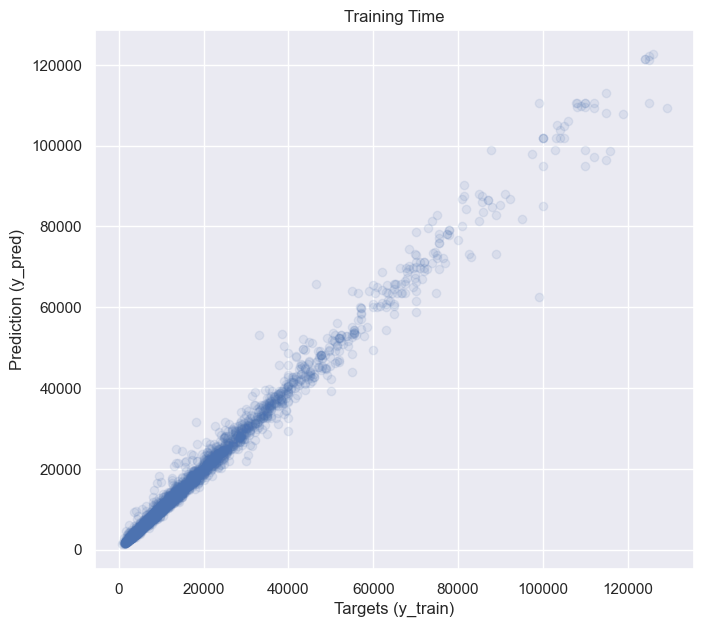

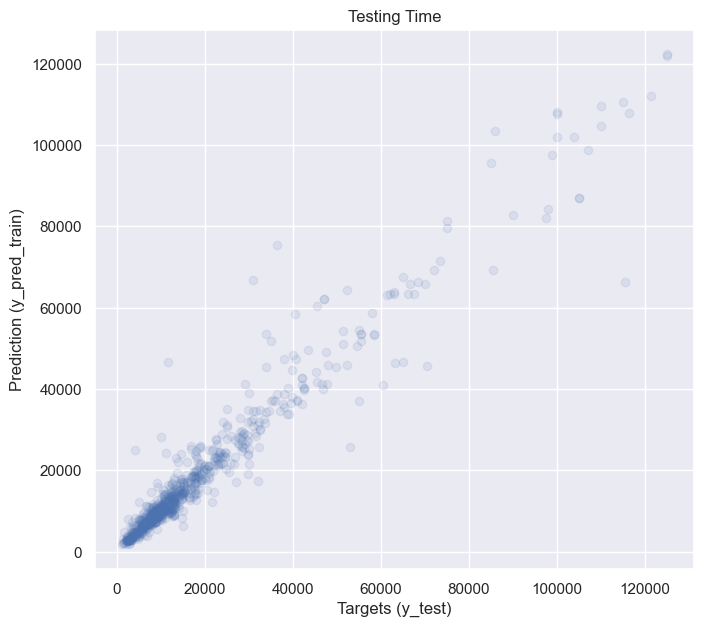

In [69]:
plt.figure(figsize=(17,7))
y_pred_train = rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.1)
plt.xlabel('Targets (y_train)')
plt.ylabel('Prediction (y_pred)')
plt.title('Training Time')
plt.show()

plt.figure(figsize=(17,7))
y_pred_test = rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.1)
plt.xlabel('Targets (y_test)')
plt.ylabel('Prediction (y_pred_train)')
plt.title('Testing Time') 
plt.show()

#### Baz model i√ßin Residual kontrol√º

Text(0.5, 1.0, 'Residuals Test PDF')

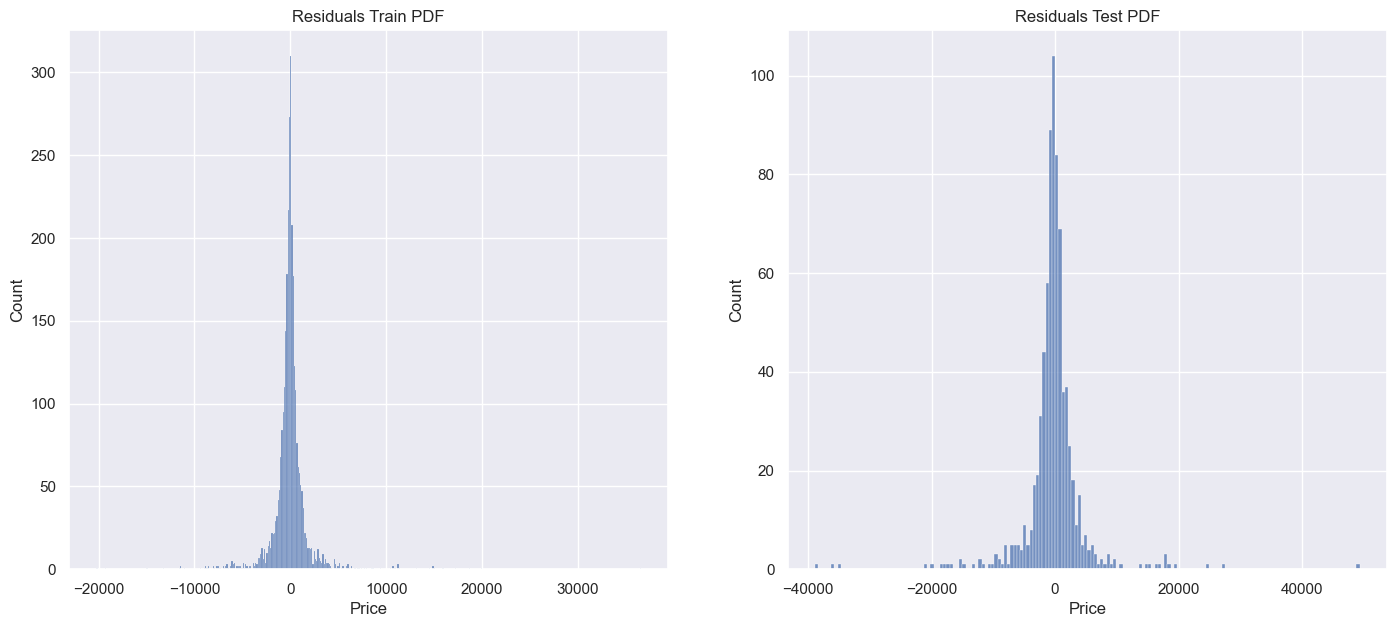

In [70]:
residuals_train = (y_train - rf_1.predict(X_train))
residuals_test = (y_test - rf_1.predict(X_test))

plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.histplot(residuals_train)
plt.title('Residuals Train PDF')

plt.subplot(1,2,2)
sns.histplot(residuals_test)
plt.title('Residuals Test PDF') 

In [71]:
df_eval = pd.DataFrame(rf_1.predict(X_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_eval['Target'] = y_test

df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual']/df_eval['Target']*100)

df_eval

Prediction    Target  Residual  Difference%
0      17584.41  19000.00   1415.59         7.45
1       6007.29   5500.00   -507.29         9.22
2      25810.46  19200.00  -6610.46        34.43
3      12638.29  11900.00   -738.29         6.20
4       9226.42   7750.00  -1476.42        19.05
5      22968.77  13500.00  -9468.77        70.14
6      13124.24  12700.00   -424.24         3.34
7      53522.70  55555.00   2032.30         3.66
8       4822.89   1500.00  -3322.89       221.53
9      11915.00  11000.00   -915.00         8.32
10     11232.42  10600.00   -632.42         5.97
11     69340.34  85555.00  16214.66        18.95
12      9257.98   6800.00  -2457.98        36.15
13      3032.94   4800.00   1767.06        36.81
14     41234.74  47777.00   6542.26        13.69
15      8922.51   9800.00    877.49         8.95
16      7439.99   4999.00  -2440.99        48.83
17     14336.95  18500.00   4163.05        22.50
18      8962.88   8300.00   -662.88         7.99
19      6019.45   2900.00  -3119.45       107.57
20     11402.99  13500.00   2097.01        15.53
21     10634.50  12500.00   1865.50        14.92
22      9332.99   9300.00    -32.99         0.35
23     10607.49   9999.00   -608.49         6.09
24     31788.14  24000.00  -7788.14        32.45
25      8825.66   8300.00   -525.66         6.33
26     22130.50  13900.00  -8230.50        59.21
27      9519.79  10400.00    880.21         8.46
28      9061.46   9000.00    -61.46         0.68
29     12876.87  13900.00   1023.13         7.36
30     13266.78  12900.00   -366.78         2.84
31     15363.76  14300.00  -1063.76         7.44
32     32681.87  30900.00  -1781.87         5.77
33     11636.47   8100.00  -3536.47        43.66
34     23916.49  14500.00  -9416.49        64.94
35      9316.95   6000.00  -3316.95        55.28
36      8330.69   9200.00    869.31         9.45
37     21785.74  18500.00  -3285.74        17.76
38     18072.34  20000.00   1927.66         9.64
39     34385.15  33800.00   -585.15         1.73
40      2954.74   3000.00     45.26         1.51
41     10579.43  10700.00    120.57         1.13
42      8021.95   7500.00   -521.95         6.96
43     29032.30  23900.00  -5132.30        21.47
44      3614.49   3500.00   -114.49         3.27
45     41072.98  60500.00  19427.02        32.11
46     11284.53  12999.00   1714.47        13.19
47     60406.52  45500.00 -14906.52        32.76
48     13446.03  11900.00  -1546.03        12.99
49      3738.00   4600.00    862.00        18.74
50      4819.33   5000.00    180.67         3.61
51      7876.14   9600.00   1723.86        17.96
52      8875.62   9999.00   1123.38        11.23
53      9883.43  10600.00    716.57         6.76
54      9607.16   9600.00     -7.16         0.07
55      6877.42   6800.00    -77.42         1.14
56     14444.66  16500.00   2055.34        12.46
57     26098.47  16800.00  -9298.47        55.35
58      8922.51   9990.00   1067.49        10.69
59     24937.94   4100.00 -20837.94       508.24
60     29068.96  31500.00   2431.04         7.72
61     58348.84  40500.00 -17848.84        44.07
62      9056.80   7777.00  -1279.80        16.46
63     21252.09  22000.00    747.91         3.40
64     24548.90  23000.00  -1548.90         6.73
65     17377.47  32000.00  14622.53        45.70
66      8797.42   6999.00  -1798.42        25.70
67     33745.02  38764.00   5018.98        12.95
68      4844.53   4700.00   -144.53         3.08
69      9186.69   7899.00  -1287.69        16.30
70      9881.50   7700.00  -2181.50        28.33
71     13815.16  14500.00    684.84         4.72
72     27856.99  28000.00    143.01         0.51
73     24354.00  11200.00 -13154.00       117.45
74      8018.97   2400.00  -5618.97       234.12
75      9679.97   9600.00    -79.97         0.83
76     97656.03  99000.00   1343.97         1.36
77      3519.39   3400.00   -119.39         3.51
78     27652.99  24950.00  -2702.99        10.83
79      8091.50   8000.00    -91.50         1.14
80     14156.09  14500.00    343.91 

In [72]:
df_eval.describe()

Prediction    Target  Residual  Difference%
count      774.00    774.00    774.00       774.00
mean     18834.85  18602.02   -232.84        17.14
std      19464.29  20139.56   5017.30        29.66
min       1757.64   1200.00 -38844.91         0.01
25%       7877.42   7500.00  -1374.36         4.38
50%      11887.94  11900.00   -152.20         9.43
75%      21712.70  20999.06   1018.17        19.67
max     122279.00 125000.00  49274.34       508.24

≈ûimdi modelin daha genel hale getirilmesi i√ßin hiperparametreleri ayarlanacak

In [73]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomForestRegressor()

random_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 7],
    'n_estimators': [100, 200]}

rf_random = RandomizedSearchCV(
    estimator = rf_random,
    param_distributions = random_grid,
    n_iter = 100,
    cv = 3,
    verbose=8,
    n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 200]},
                   verbose=8)

In [74]:
rf_random.best_estimator_, rf_random.best_params_, rf_random.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                       n_estimators=200),
 {'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 20,
  'bootstrap': False},
 0.9268480525171325)

In [75]:
np.sqrt(mean_squared_error(y_train, rf_random.predict(X_train)))

634.0976920439595

### 7.4 Base Random Forest Model Sonu√ßlarƒ±

#### Residual (Hata) Kontrol√º

In [76]:
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

4116.427962958584

model hala overfit durumda. Eƒüitim error 630 ve test error 4177 olarak √ßƒ±kƒ±yor.

≈ûimdi GridSearchCV ile deneme 

In [77]:
from sklearn.model_selection import GridSearchCV

rf_grid_model = RandomForestRegressor()

param_grid =  {'bootstrap': [False],
  'max_depth': [25,30,35],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1,2],
  'min_samples_split': [1,2,3],
  'n_estimators': [100,150,200]}

rf_grid = GridSearchCV(estimator=rf_grid_model,
                       param_grid=param_grid,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)

rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [25, 30, 35],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]},
             verbose=8)

In [78]:
rf_grid.best_estimator_, rf_grid.best_params_, rf_grid.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=25, max_features='sqrt',
                       min_samples_split=3, n_estimators=200),
 {'bootstrap': False,
  'max_depth': 25,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 3,
  'n_estimators': 200},
 0.9288362753808695)

In [79]:
np.sqrt(mean_squared_error(y_train, rf_grid.predict(X_train)))

976.6704525562106

### 7.5 Hiperparametre Optimizasyonu

Modelin daha genel hale getirilmesi i√ßin **hiperparametreleri** ayarlayacaƒüƒ±z.

#### 7.5.1 RandomizedSearchCV ile Optimizasyon

In [80]:
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

4116.427962958584

Sorun, dahili modeldeki toplam Decision Tree sayƒ±sƒ±nda ortaya √ßƒ±kƒ±yor gibi g√∂r√ºn√ºyor. N_estimators hiper parametresi varyansƒ± d√º≈ü√ºrmek i√ßin azaltƒ±lmak isteniyor.

Fark ettiƒüimiz gibi, t√ºm parametreler harika √ßalƒ±≈üƒ±yor ancak n_estimators'ƒ± d√º≈ü√ºr√ºyor. Eƒüitim error'u y√ºkseliyor.

#### Yine en iyi modeli bulmak i√ßin GridSearchCV'yi deniyoruz


In [81]:
rf_grid_model_2 = RandomForestRegressor()

param_grid_2 =  {'bootstrap': [False],
  'max_depth': [28,30,32],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1],
  'min_samples_split': [2,3,4],
  'n_estimators': [50,80,100]}

rf_grid_2 = GridSearchCV(estimator=rf_grid_model_2,
                       param_grid=param_grid_2,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)

rf_grid_2.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [28, 30, 32],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             verbose=8)

In [82]:
rf_grid_2.best_estimator_, rf_grid_2.best_params_, rf_grid_2.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_split=3),
 {'bootstrap': False,
  'max_depth': 30,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 3,
  'n_estimators': 100},
 0.9277537067566071)


#### 7.5.2 RandomizedSearchCV Sonu√ßlarƒ±

‚ö†Ô∏è **Overfitting Tespit Edildi:**
- **Eƒüitim hatasƒ±**: 630
- **Test hatasƒ±**: 4,177
- **Sonu√ß**: Model eƒüitim verisine a≈üƒ±rƒ± uyum saƒülamƒ±≈ü

**√á√∂z√ºm**: GridSearchCV ile daha detaylƒ± parametre aramasƒ± yapacaƒüƒ±z.

In [83]:
np.sqrt(mean_squared_error(y_train, rf_grid_2.predict(X_train)))

987.3701735548907

In [84]:
np.sqrt(mean_squared_error(y_test, rf_grid_2.predict(X_test)))

4454.396689242576

Text(0.5, 1.0, 'Testing Time')

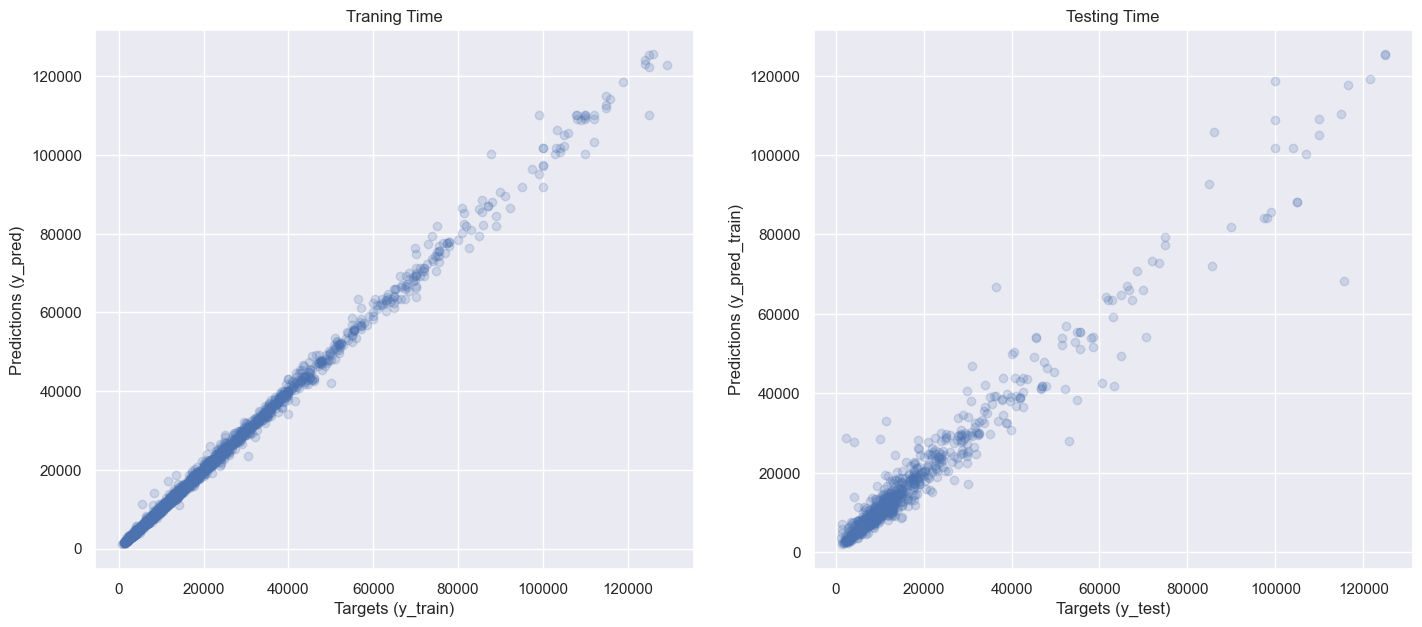

In [85]:
plt.figure(figsize=(17,7))
y_pred_train = rf_grid_2.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2) 
plt.xlabel('Targets (y_train)') 
plt.ylabel('Predictions (y_pred)') 
plt.title('Traning Time') 

y_pred_test = rf_grid_2.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2) 
plt.xlabel('Targets (y_test)') 
plt.ylabel('Predictions (y_pred_train)') 
plt.title('Testing Time') 

In [86]:
from sklearn.metrics import r2_score

print(f'Traning r2_score: {r2_score(y_train, rf_grid_2.predict(X_train))}')
print(f'Testing r2_score: {r2_score(y_test, rf_grid_2.predict(X_test))}')

Traning r2_score: 0.9972451759191477
Testing r2_score: 0.9510176826811712


model o kadar da k√∂t√º deƒüil, ancak RandomForest LinearRegression'dan daha iyi performans g√∂steriyor

#### 7.5.3 GridSearchCV Sonu√ßlarƒ± ve Analiz

**üîç Sorun Tespiti:**
- **n_estimators** parametresinde sorun var
- √áok fazla **Decision Tree** overfitting'e neden oluyor
- **√á√∂z√ºm**: n_estimators'ƒ± d√º≈ü√ºrerek varyansƒ± azaltmak

**G√∂zlem**: T√ºm parametreler iyi √ßalƒ±≈üƒ±yor ancak n_estimators d√º≈ü√ºr√ºld√ºƒü√ºnde eƒüitim hatasƒ± artƒ±yor (bu aslƒ±nda iyi bir i≈üaret).


Text(0.5, 1.0, 'Testting Residual PDF')

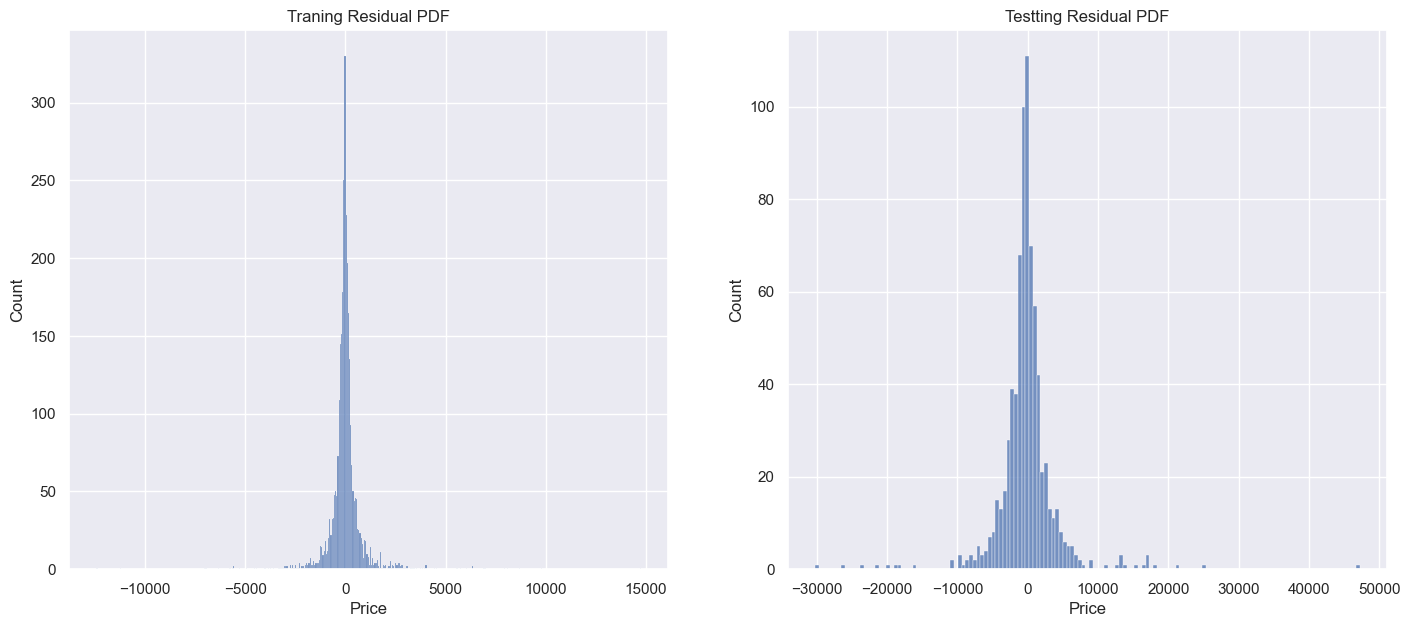

In [87]:
residual_train = (y_train - rf_grid_2.predict(X_train))
residual_test = (y_test - rf_grid_2.predict(X_test))

# ploting the distribution of the residual on training
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.histplot(residual_train) 
plt.title('Traning Residual PDF') 

# ploting the distribution of the residual
plt.subplot(1,2,2)
sns.histplot(residual_test) 
plt.title('Testting Residual PDF') 

#### 7.5.4 ƒ∞kinci GridSearchCV Denemesi

En iyi modeli bulmak i√ßin daha dar parametre aralƒ±ƒüƒ±nda GridSearchCV deniyoruz.

O kadar da k√∂t√º deƒüil ayrƒ±ca Lineer Regresyondan √ßok daha iyi.

Verilerin √ßoƒüu 0 √ºzerinde yer alƒ±yor, √ßoƒüu durumda doƒüru karar veriyor.

Lineer Regresyon gibi df_eval olu≈üturma

In [88]:
df_eval = pd.DataFrame(rf_grid_2.predict(X_test), columns=['Prediction'])
# adding column
y_test = y_test.reset_index(drop=True)
df_eval['Tareget'] = y_test

# creating residual columns and difference column
df_eval['Residual'] = df_eval['Tareget'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Tareget']*100)
# checking the performance data
df_eval

Prediction   Tareget  Residual  Difference%
0      17664.00  19000.00   1336.00         7.03
1       4980.95   5500.00    519.05         9.44
2      24403.17  19200.00  -5203.17        27.10
3      11786.14  11900.00    113.86         0.96
4       7816.72   7750.00    -66.72         0.86
5      24320.13  13500.00 -10820.13        80.15
6      13011.46  12700.00   -311.46         2.45
7      55499.44  55555.00     55.56         0.10
8       4662.94   1500.00  -3162.94       210.86
9      12175.00  11000.00  -1175.00        10.68
10     11886.33  10600.00  -1286.33        12.14
11     72067.31  85555.00  13487.69        15.76
12      8199.74   6800.00  -1399.74        20.58
13      3648.99   4800.00   1151.01        23.98
14     41725.44  47777.00   6051.56        12.67
15      9017.90   9800.00    782.10         7.98
16      7966.32   4999.00  -2967.32        59.36
17     14693.92  18500.00   3806.08        20.57
18      8616.81   8300.00   -316.81         3.82
19      5952.22   2900.00  -3052.22       105.25
20      9053.58  13500.00   4446.42        32.94
21      9905.60  12500.00   2594.40        20.76
22      9078.88   9300.00    221.12         2.38
23     11105.24   9999.00  -1106.24        11.06
24     27989.77  24000.00  -3989.77        16.62
25      8340.75   8300.00    -40.75         0.49
26     20236.13  13900.00  -6336.13        45.58
27      9164.88  10400.00   1235.12        11.88
28      8845.32   9000.00    154.68         1.72
29     13080.79  13900.00    819.21         5.89
30     12851.73  12900.00     48.27         0.37
31     14393.11  14300.00    -93.11         0.65
32     30196.03  30900.00    703.97         2.28
33      9913.96   8100.00  -1813.96        22.39
34     14564.48  14500.00    -64.48         0.44
35      7766.61   6000.00  -1766.61        29.44
36      8033.03   9200.00   1166.97        12.68
37     21098.83  18500.00  -2598.83        14.05
38     19047.10  20000.00    952.90         4.76
39     35530.46  33800.00  -1730.46         5.12
40      3329.02   3000.00   -329.02        10.97
41      9994.12  10700.00    705.88         6.60
42      8752.93   7500.00  -1252.93        16.71
43     29986.33  23900.00  -6086.33        25.47
44      3816.74   3500.00   -316.74         9.05
45     42481.74  60500.00  18018.26        29.78
46     10977.33  12999.00   2021.67        15.55
47     54037.03  45500.00  -8537.03        18.76
48     12711.99  11900.00   -811.99         6.82
49      4765.71   4600.00   -165.71         3.60
50      4672.64   5000.00    327.36         6.55
51      7188.38   9600.00   2411.62        25.12
52      9234.93   9999.00    764.07         7.64
53      9458.90  10600.00   1141.10        10.77
54     10428.98   9600.00   -828.98         8.64
55      7453.44   6800.00   -653.44         9.61
56     13566.91  16500.00   2933.09        17.78
57     19490.08  16800.00  -2690.08        16.01
58      8919.88   9990.00   1070.12        10.71
59     27711.62   4100.00 -23611.62       575.89
60     26520.49  31500.00   4979.51        15.81
61     50275.35  40500.00  -9775.35        24.14
62      8719.93   7777.00   -942.93        12.12
63     20906.03  22000.00   1093.97         4.97
64     18973.42  23000.00   4026.58        17.51
65     24803.47  32000.00   7196.53        22.49
66      8766.47   6999.00  -1767.47        25.25
67     32592.78  38764.00   6171.22        15.92
68      5342.40   4700.00   -642.40        13.67
69      9361.35   7899.00  -1462.35        18.51
70      9172.01   7700.00  -1472.01        19.12
71     14478.47  14500.00     21.53         0.15
72     29588.10  28000.00  -1588.10         5.67
73     19394.15  11200.00  -8194.15        73.16
74     28835.44   2400.00 -26435.44      1101.48
75     10008.24   9600.00   -408.24         4.25
76     85634.94  99000.00  13365.06        13.50
77      3555.74   3400.00   -155.74         4.58
78     28241.73  24950.00  -3291.73        13.19
79      7892.00   8000.00    108.00         1.35
80     14793.67  14500.00   -293.67 

In [89]:
df_eval.describe()

Prediction   Tareget  Residual  Difference%
count      774.00    774.00    774.00       774.00
mean     18773.61  18602.02   -171.59        19.25
std      19328.48  20139.56   4453.97        51.66
min       1894.77   1200.00 -30244.47         0.00
25%       7915.55   7500.00  -1485.24         4.58
50%      11883.67  11900.00   -264.44        10.57
75%      21694.34  20999.06    967.78        20.53
max     125320.00 125000.00  47198.81      1101.48

In [90]:
import joblib

joblib.dump(rf_1, 'rf1_base_rf.pkl', compress=3)

['rf1_base_rf.pkl']

## üöÄ 8. XGBoost Model Geli≈ütirme

### 8.1 XGBoost Yakla≈üƒ±mƒ±

**XGBoost (Extreme Gradient Boosting)** en pop√ºler ve etkili makine √∂ƒürenmesi algoritmalarƒ±ndan biridir. Gradient boosting'in optimize edilmi≈ü versiyonudur.

In [91]:
# XGBoost i√ßin veri hazƒ±rlƒ±ƒüƒ± (Random Forest ile aynƒ± veri)
car = pd.read_csv('Car_cleaned_with_Model.csv')

# Kategorik encoding (Random Forest b√∂l√ºm√ºnden)
brand_dict = dict()
body_dict = dict()
engine_type_dict = dict()
registration_dict = dict()
model_dict = dict()

le = LabelEncoder()

car['brand_enc'] = le.fit_transform(car['Brand'])
for num, lbl in enumerate(le.classes_):
    brand_dict[lbl] = num

car['body_enc'] = le.fit_transform(car['Body'])
for num, lbl in enumerate(le.classes_):
    body_dict[lbl] = num

car['engine_type_enc'] = le.fit_transform(car['Engine Type'])
for num, lbl in enumerate(le.classes_):
    engine_type_dict[lbl] = num

car['registration_enc'] = le.fit_transform(car['Registration'])
for num, lbl in enumerate(le.classes_):
    registration_dict[lbl] = num

car['model_enc'] = le.fit_transform(car['Model'])
for num, lbl in enumerate(le.classes_):
    model_dict[lbl] = num

car_xgb = car.drop(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], axis=1)

X_xgb = car_xgb.drop('Price', axis=1)
y_xgb = car_xgb['Price']

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

print(f"XGBoost Training data shape: {X_train_xgb.shape}")
print(f"XGBoost Test data shape: {X_test_xgb.shape}")

XGBoost Training data shape: (3093, 8)
XGBoost Test data shape: (774, 8)


In [92]:
# XGBoost Base Model
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_xgb = xgb_model.predict(X_train_xgb)
y_pred_test_xgb = xgb_model.predict(X_test_xgb)

# Performans metrikleri
rmse_train_xgb = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_xgb))
r2_train_xgb = r2_score(y_train_xgb, y_pred_train_xgb)
r2_test_xgb = r2_score(y_test_xgb, y_pred_test_xgb)

print("\nüìä XGBoost Base Model Sonu√ßlarƒ±:")
print(f"RMSE Train: {rmse_train_xgb:.2f}")
print(f"RMSE Test: {rmse_test_xgb:.2f}")
print(f"R¬≤ Train: {r2_train_xgb:.4f}")
print(f"R¬≤ Test: {r2_test_xgb:.4f}")


üìä XGBoost Base Model Sonu√ßlarƒ±:
RMSE Train: 1309.15
RMSE Test: 4424.91
R¬≤ Train: 0.9952
R¬≤ Test: 0.9496


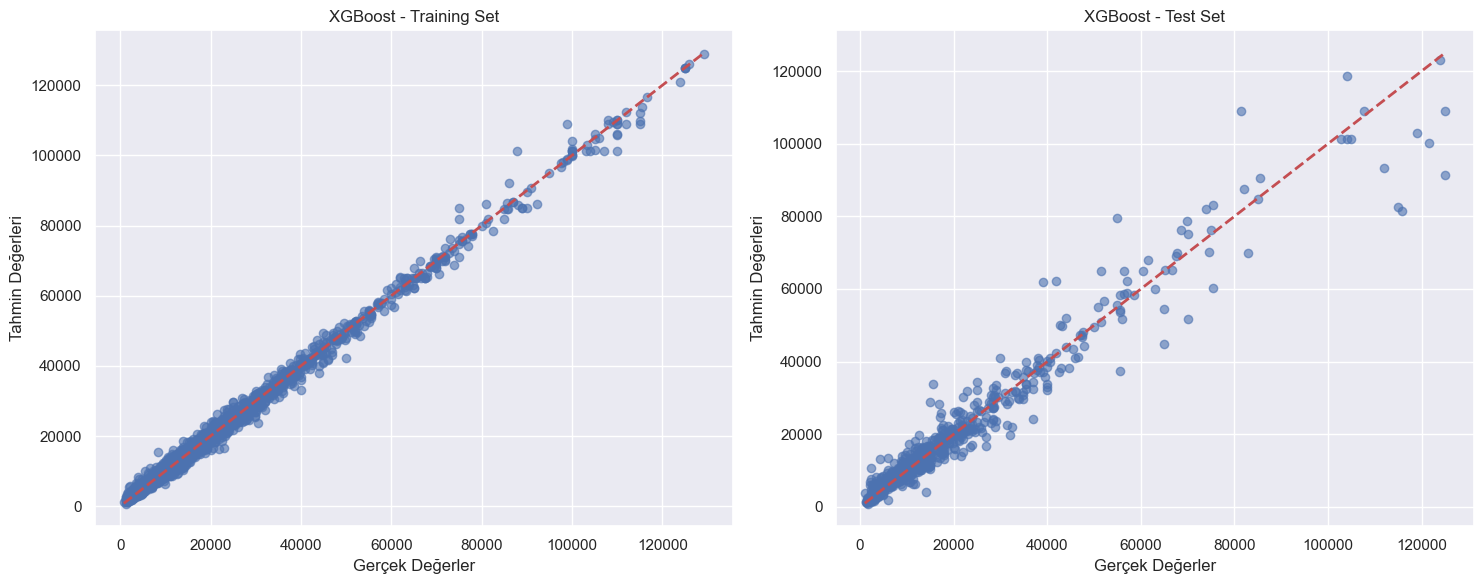

In [93]:
# XGBoost Tahmin vs Ger√ßek Deƒüer Grafiƒüi
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_xgb, y_pred_train_xgb, alpha=0.6)
plt.plot([y_train_xgb.min(), y_train_xgb.max()], [y_train_xgb.min(), y_train_xgb.max()], 'r--', lw=2)
plt.xlabel('Ger√ßek Deƒüerler')
plt.ylabel('Tahmin Deƒüerleri')
plt.title('XGBoost - Training Set')

plt.subplot(1, 2, 2)
plt.scatter(y_test_xgb, y_pred_test_xgb, alpha=0.6)
plt.plot([y_test_xgb.min(), y_test_xgb.max()], [y_test_xgb.min(), y_test_xgb.max()], 'r--', lw=2)
plt.xlabel('Ger√ßek Deƒüerler')
plt.ylabel('Tahmin Deƒüerleri')
plt.title('XGBoost - Test Set')

plt.tight_layout()
plt.show()

## ‚ö° 9. LightGBM Model Geli≈ütirme

### 9.1 LightGBM Yakla≈üƒ±mƒ±

**LightGBM** Microsoft tarafƒ±ndan geli≈ütirilen hƒ±zlƒ± gradient boosting framework√ºd√ºr. XGBoost'a alternatif olarak geli≈ütirilmi≈ü ve genellikle daha hƒ±zlƒ± eƒüitim saƒülar.

In [94]:
# LightGBM Model
lgb_model = LGBMRegressor(random_state=42, n_estimators=100, verbose=-1)
lgb_model.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_lgb = lgb_model.predict(X_train_xgb)
y_pred_test_lgb = lgb_model.predict(X_test_xgb)

# Performans metrikleri
rmse_train_lgb = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_lgb))
rmse_test_lgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_lgb))
r2_train_lgb = r2_score(y_train_xgb, y_pred_train_lgb)
r2_test_lgb = r2_score(y_test_xgb, y_pred_test_lgb)

print("\nüìä LightGBM Model Sonu√ßlarƒ±:")
print(f"RMSE Train: {rmse_train_lgb:.2f}")
print(f"RMSE Test: {rmse_test_lgb:.2f}")
print(f"R¬≤ Train: {r2_train_lgb:.4f}")
print(f"R¬≤ Test: {r2_test_lgb:.4f}")

  File "c:\MyCode\pythonProjects\ai_homework\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\onure\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\onure\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\onure\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1491, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



üìä LightGBM Model Sonu√ßlarƒ±:
RMSE Train: 3053.80
RMSE Test: 4645.16
R¬≤ Train: 0.9740
R¬≤ Test: 0.9445


## üê± 10. CatBoost Model Geli≈ütirme

### 10.1 CatBoost Yakla≈üƒ±mƒ±

**CatBoost** Yandex tarafƒ±ndan geli≈ütirilen gradient boosting k√ºt√ºphanesidir. Kategorik deƒüi≈ükenleri otomatik olarak i≈üler ve overfitting'e kar≈üƒ± diren√ßlidir.

In [95]:
# CatBoost Model
cat_model = CatBoostRegressor(random_state=42, iterations=100, verbose=False)
cat_model.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_cat = cat_model.predict(X_train_xgb)
y_pred_test_cat = cat_model.predict(X_test_xgb)

# Performans metrikleri
rmse_train_cat = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_cat))
rmse_test_cat = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_cat))
r2_train_cat = r2_score(y_train_xgb, y_pred_train_cat)
r2_test_cat = r2_score(y_test_xgb, y_pred_test_cat)

print("\nüìä CatBoost Model Sonu√ßlarƒ±:")
print(f"RMSE Train: {rmse_train_cat:.2f}")
print(f"RMSE Test: {rmse_test_cat:.2f}")
print(f"R¬≤ Train: {r2_train_cat:.4f}")
print(f"R¬≤ Test: {r2_test_cat:.4f}")


üìä CatBoost Model Sonu√ßlarƒ±:
RMSE Train: 2816.37
RMSE Test: 4022.20
R¬≤ Train: 0.9778
R¬≤ Test: 0.9584


## üìà 11. Gradient Boosting Regressor

### 11.1 Scikit-learn Gradient Boosting

Scikit-learn'√ºn built-in **Gradient Boosting Regressor** modelini test edelim.

In [96]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb_model.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_gb = gb_model.predict(X_train_xgb)
y_pred_test_gb = gb_model.predict(X_test_xgb)

# Performans metrikleri
rmse_train_gb = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_gb))
rmse_test_gb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_gb))
r2_train_gb = r2_score(y_train_xgb, y_pred_train_gb)
r2_test_gb = r2_score(y_test_xgb, y_pred_test_gb)

print("\nüìä Gradient Boosting Model Sonu√ßlarƒ±:")
print(f"RMSE Train: {rmse_train_gb:.2f}")
print(f"RMSE Test: {rmse_test_gb:.2f}")
print(f"R¬≤ Train: {r2_train_gb:.4f}")
print(f"R¬≤ Test: {r2_test_gb:.4f}")


üìä Gradient Boosting Model Sonu√ßlarƒ±:
RMSE Train: 4640.05
RMSE Test: 5659.59
R¬≤ Train: 0.9399
R¬≤ Test: 0.9176


## üå≥ 12. Extra Trees Regressor

### 12.1 Extremely Randomized Trees

**Extra Trees** Random Forest'ƒ±n daha randomize edilmi≈ü versiyonudur. Split'leri random se√ßer.

In [97]:
# Extra Trees Regressor
et_model = ExtraTreesRegressor(random_state=42, n_estimators=100)
et_model.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_et = et_model.predict(X_train_xgb)
y_pred_test_et = et_model.predict(X_test_xgb)

# Performans metrikleri
rmse_train_et = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_et))
rmse_test_et = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_et))
r2_train_et = r2_score(y_train_xgb, y_pred_train_et)
r2_test_et = r2_score(y_test_xgb, y_pred_test_et)

print("\nüìä Extra Trees Model Sonu√ßlarƒ±:")
print(f"RMSE Train: {rmse_train_et:.2f}")
print(f"RMSE Test: {rmse_test_et:.2f}")
print(f"R¬≤ Train: {r2_train_et:.4f}")
print(f"R¬≤ Test: {r2_test_et:.4f}")


üìä Extra Trees Model Sonu√ßlarƒ±:
RMSE Train: 547.91
RMSE Test: 4011.73
R¬≤ Train: 0.9992
R¬≤ Test: 0.9586


## üìè 13. Linear Model Varyasyonlarƒ±

### 13.1 Ridge, Lasso ve Elastic Net

Linear Regression'ƒ±n regularized versiyonlarƒ±nƒ± test edelim. Bu modeller i√ßin scaled veri kullanacaƒüƒ±z.

In [98]:
# Linear modeller i√ßin scaled veri hazƒ±rlƒ±ƒüƒ±
car_linear = pd.read_csv('Car_preproccesed.csv')
X_linear = car_linear.drop('log_price', axis=1)
y_linear = car_linear['log_price']

# Scaling
scaler = StandardScaler()
X_linear_scaled = scaler.fit_transform(X_linear)

# Train-test split
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear_scaled, y_linear, test_size=0.2, random_state=42
)

print(f"Linear models training data shape: {X_train_linear.shape}")

Linear models training data shape: (3093, 17)


In [99]:
# Ridge Regression (L2 Regularization)
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_linear, y_train_linear)

# Tahminler
y_pred_train_ridge = ridge_model.predict(X_train_linear)
y_pred_test_ridge = ridge_model.predict(X_test_linear)

# Performans metrikleri (log deƒüerlerini normal fiyata √ßeviriyoruz)
rmse_train_ridge = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_ridge)))
rmse_test_ridge = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_ridge)))
r2_train_ridge = r2_score(y_train_linear, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test_linear, y_pred_test_ridge)

print("\nüìä Ridge Regression Sonu√ßlarƒ±:")
print(f"RMSE Train: {rmse_train_ridge:.2f}")
print(f"RMSE Test: {rmse_test_ridge:.2f}")
print(f"R¬≤ Train: {r2_train_ridge:.4f}")
print(f"R¬≤ Test: {r2_test_ridge:.4f}")


üìä Ridge Regression Sonu√ßlarƒ±:
RMSE Train: 10133.85
RMSE Test: 11314.76
R¬≤ Train: 0.7546
R¬≤ Test: 0.7353


In [100]:
# Lasso Regression (L1 Regularization)
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_linear, y_train_linear)

# Tahminler
y_pred_train_lasso = lasso_model.predict(X_train_linear)
y_pred_test_lasso = lasso_model.predict(X_test_linear)

# Performans metrikleri
rmse_train_lasso = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_lasso)))
rmse_test_lasso = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_lasso)))
r2_train_lasso = r2_score(y_train_linear, y_pred_train_lasso)
r2_test_lasso = r2_score(y_test_linear, y_pred_test_lasso)

print("\nüìä Lasso Regression Sonu√ßlarƒ±:")
print(f"RMSE Train: {rmse_train_lasso:.2f}")
print(f"RMSE Test: {rmse_test_lasso:.2f}")
print(f"R¬≤ Train: {r2_train_lasso:.4f}")
print(f"R¬≤ Test: {r2_test_lasso:.4f}")


üìä Lasso Regression Sonu√ßlarƒ±:
RMSE Train: 14550.19
RMSE Test: 15682.93
R¬≤ Train: 0.6181
R¬≤ Test: 0.5923


In [101]:
# Elastic Net (L1 + L2 Regularization)
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_linear, y_train_linear)

# Tahminler
y_pred_train_elastic = elastic_model.predict(X_train_linear)
y_pred_test_elastic = elastic_model.predict(X_test_linear)

# Performans metrikleri
rmse_train_elastic = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_elastic)))
rmse_test_elastic = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_elastic)))
r2_train_elastic = r2_score(y_train_linear, y_pred_train_elastic)
r2_test_elastic = r2_score(y_test_linear, y_pred_test_elastic)

print("\nüìä Elastic Net Sonu√ßlarƒ±:")
print(f"RMSE Train: {rmse_train_elastic:.2f}")
print(f"RMSE Test: {rmse_test_elastic:.2f}")
print(f"R¬≤ Train: {r2_train_elastic:.4f}")
print(f"R¬≤ Test: {r2_test_elastic:.4f}")


üìä Elastic Net Sonu√ßlarƒ±:
RMSE Train: 13375.46
RMSE Test: 14525.86
R¬≤ Train: 0.6837
R¬≤ Test: 0.6586


## üéØ 14. Support Vector Regression (SVR)

### 14.1 SVR ile Non-linear ƒ∞li≈ükiler

**Support Vector Regression** kernel trick kullanarak non-linear ili≈ükileri yakalayabilir.

In [102]:
# Support Vector Regression (RBF Kernel)
svr_model = SVR(kernel='rbf', C=100, gamma='scale')
svr_model.fit(X_train_linear, y_train_linear)

# Tahminler
y_pred_train_svr = svr_model.predict(X_train_linear)
y_pred_test_svr = svr_model.predict(X_test_linear)

# Performans metrikleri
rmse_train_svr = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_svr)))
rmse_test_svr = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_svr)))
r2_train_svr = r2_score(y_train_linear, y_pred_train_svr)
r2_test_svr = r2_score(y_test_linear, y_pred_test_svr)

print("\nüìä SVR Model Sonu√ßlarƒ±:")
print(f"RMSE Train: {rmse_train_svr:.2f}")
print(f"RMSE Test: {rmse_test_svr:.2f}")
print(f"R¬≤ Train: {r2_train_svr:.4f}")
print(f"R¬≤ Test: {r2_test_svr:.4f}")


üìä SVR Model Sonu√ßlarƒ±:
RMSE Train: 6552.41
RMSE Test: 11091.84
R¬≤ Train: 0.8409
R¬≤ Test: 0.7117


## üß† 15. Neural Network Modeli

### 15.1 Multi-Layer Perceptron (MLP)

Scikit-learn'√ºn **MLPRegressor** modelini kullanarak basit bir neural network olu≈üturalƒ±m.

In [103]:
# Multi-Layer Perceptron Regressor
mlp_model = MLPRegressor(
    hidden_layer_sizes=(100, 50, 25),
    activation='relu',
    solver='adam',
    alpha=0.001,
    max_iter=500,
    random_state=42
)

mlp_model.fit(X_train_linear, y_train_linear)

# Tahminler
y_pred_train_mlp = mlp_model.predict(X_train_linear)
y_pred_test_mlp = mlp_model.predict(X_test_linear)

# Performans metrikleri
rmse_train_mlp = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_mlp)))
rmse_test_mlp = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_mlp)))
r2_train_mlp = r2_score(y_train_linear, y_pred_train_mlp)
r2_test_mlp = r2_score(y_test_linear, y_pred_test_mlp)

print("\nüìä Neural Network (MLP) Sonu√ßlarƒ±:")
print(f"RMSE Train: {rmse_train_mlp:.2f}")
print(f"RMSE Test: {rmse_test_mlp:.2f}")
print(f"R¬≤ Train: {r2_train_mlp:.4f}")
print(f"R¬≤ Test: {r2_test_mlp:.4f}")


üìä Neural Network (MLP) Sonu√ßlarƒ±:
RMSE Train: 8203.64
RMSE Test: 10876.87
R¬≤ Train: 0.8197
R¬≤ Test: 0.7334


### 15.2 Keras Deep Neural Network

TensorFlow/Keras ile daha geli≈ümi≈ü bir neural network olu≈üturalƒ±m.

In [104]:
# Keras Deep Neural Network
def create_dnn_model(input_dim):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(128, activation='relu'),
        Dropout(0.2),
        
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    return model

# Model olu≈ütur ve eƒüit
dnn_model = create_dnn_model(X_train_linear.shape[1])

history = dnn_model.fit(
    X_train_linear, y_train_linear,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    verbose=0
)

# Tahminler
y_pred_train_dnn = dnn_model.predict(X_train_linear, verbose=0).flatten()
y_pred_test_dnn = dnn_model.predict(X_test_linear, verbose=0).flatten()

# Performans metrikleri
rmse_train_dnn = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_dnn)))
rmse_test_dnn = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_dnn)))
r2_train_dnn = r2_score(y_train_linear, y_pred_train_dnn)
r2_test_dnn = r2_score(y_test_linear, y_pred_test_dnn)

print("\nüìä Deep Neural Network (Keras) Sonu√ßlarƒ±:")
print(f"RMSE Train: {rmse_train_dnn:.2f}")
print(f"RMSE Test: {rmse_test_dnn:.2f}")
print(f"R¬≤ Train: {r2_train_dnn:.4f}")
print(f"R¬≤ Test: {r2_test_dnn:.4f}")







üìä Deep Neural Network (Keras) Sonu√ßlarƒ±:
RMSE Train: 8695.78
RMSE Test: 10898.60
R¬≤ Train: 0.7775
R¬≤ Test: 0.7299

üìä Deep Neural Network (Keras) Sonu√ßlarƒ±:
RMSE Train: 8695.78
RMSE Test: 10898.60
R¬≤ Train: 0.7775
R¬≤ Test: 0.7299


## üèÜ 16. Ensemble Methods

### 16.1 Voting Regressor

En iyi performans g√∂steren modelleri birle≈ütirerek **Voting Regressor** olu≈üturalƒ±m.

In [105]:
# En iyi modelleri se√ß ve Voting Regressor olu≈ütur
voting_regressor = VotingRegressor([
    ('xgb', XGBRegressor(random_state=42, n_estimators=100)),
    ('lgb', LGBMRegressor(random_state=42, n_estimators=100, verbose=-1)),
    ('cat', CatBoostRegressor(random_state=42, iterations=100, verbose=False)),
    ('rf', RandomForestRegressor(random_state=42, n_estimators=100))
])

voting_regressor.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_voting = voting_regressor.predict(X_train_xgb)
y_pred_test_voting = voting_regressor.predict(X_test_xgb)

# Performans metrikleri
rmse_train_voting = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_voting))
rmse_test_voting = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_voting))
r2_train_voting = r2_score(y_train_xgb, y_pred_train_voting)
r2_test_voting = r2_score(y_test_xgb, y_pred_test_voting)

print("\nüìä Voting Regressor Sonu√ßlarƒ±:")
print(f"RMSE Train: {rmse_train_voting:.2f}")
print(f"RMSE Test: {rmse_test_voting:.2f}")
print(f"R¬≤ Train: {r2_train_voting:.4f}")
print(f"R¬≤ Test: {r2_test_voting:.4f}")


üìä Voting Regressor Sonu√ßlarƒ±:
RMSE Train: 2078.58
RMSE Test: 4134.04
R¬≤ Train: 0.9879
R¬≤ Test: 0.9560


In [106]:
# Stacking Regressor - Meta-learner olarak Linear Regression kullan
base_models = [
    ('xgb', XGBRegressor(random_state=42, n_estimators=100)),
    ('lgb', LGBMRegressor(random_state=42, n_estimators=100, verbose=-1)),
    ('cat', CatBoostRegressor(random_state=42, iterations=100, verbose=False))
]

stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge(alpha=1.0),
    cv=5
)

stacking_regressor.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_stacking = stacking_regressor.predict(X_train_xgb)
y_pred_test_stacking = stacking_regressor.predict(X_test_xgb)

# Performans metrikleri
rmse_train_stacking = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_stacking))
rmse_test_stacking = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_stacking))
r2_train_stacking = r2_score(y_train_xgb, y_pred_train_stacking)
r2_test_stacking = r2_score(y_test_xgb, y_pred_test_stacking)

print("\nüìä Stacking Regressor Sonu√ßlarƒ±:")
print(f"RMSE Train: {rmse_train_stacking:.2f}")
print(f"RMSE Test: {rmse_test_stacking:.2f}")
print(f"R¬≤ Train: {r2_train_stacking:.4f}")
print(f"R¬≤ Test: {r2_test_stacking:.4f}")


üìä Stacking Regressor Sonu√ßlarƒ±:
RMSE Train: 2122.99
RMSE Test: 4051.10
R¬≤ Train: 0.9874
R¬≤ Test: 0.9578


## üìä 17. T√ºm Modellerin Kar≈üƒ±la≈ütƒ±rmasƒ±

### 17.1 Performans √ñzet Tablosu

T√ºm modellerin performansƒ±nƒ± kar≈üƒ±la≈ütƒ±ralƒ±m ve en iyi modeli belirleyelim.

In [110]:
# T√ºm model sonu√ßlarƒ±nƒ± toplama
model_results = {
    'Model': [
        'Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost',
        'Gradient Boosting', 'Extra Trees', 'Ridge Regression', 'Lasso Regression',
        'Elastic Net', 'SVR', 'Neural Network (MLP)', 'Deep Neural Network',
        'Voting Regressor', 'Stacking Regressor'
    ],
    'RMSE_Train': [
        10165, 630, rmse_train_xgb, rmse_train_lgb, rmse_train_cat,
        rmse_train_gb, rmse_train_et, rmse_train_ridge, rmse_train_lasso,
        rmse_train_elastic, rmse_train_svr, rmse_train_mlp, rmse_train_dnn,
        rmse_train_voting, rmse_train_stacking
    ],
    'RMSE_Test': [
        11692, 4177, rmse_test_xgb, rmse_test_lgb, rmse_test_cat,
        rmse_test_gb, rmse_test_et, rmse_test_ridge, rmse_test_lasso,
        rmse_test_elastic, rmse_test_svr, rmse_test_mlp, rmse_test_dnn,
        rmse_test_voting, rmse_test_stacking
    ],
    'R2_Test': [
        0.85, 0.95, r2_test_xgb, r2_test_lgb, r2_test_cat,
        r2_test_gb, r2_test_et, r2_test_ridge, r2_test_lasso,
        r2_test_elastic, r2_test_svr, r2_test_mlp, r2_test_dnn,
        r2_test_voting, r2_test_stacking
    ]
}

# DataFrame olu≈ütur
results_df = pd.DataFrame(model_results)
results_df = results_df.round(2)

# Test RMSE'ye g√∂re sƒ±rala
results_df = results_df.sort_values('RMSE_Test')

print("\nüèÜ MODEL PERFORMANS SIRAMASI (Test RMSE'ye g√∂re):")
print("=" * 80)
print(results_df.to_string(index=False))

# En iyi 3 model
print("\nü•á EN ƒ∞Yƒ∞ 3 MODEL:")
print("=" * 30)
for i in range(3):
    model_name = results_df.iloc[i]['Model']
    rmse = results_df.iloc[i]['RMSE_Test']
    r2 = results_df.iloc[i]['R2_Test']
    print(f"{i+1}. {model_name}: RMSE={rmse:.2f}, R¬≤={r2:.4f}")


üèÜ MODEL PERFORMANS SIRAMASI (Test RMSE'ye g√∂re):
               Model  RMSE_Train  RMSE_Test  R2_Test
         Extra Trees      547.91    4011.73     0.96
            CatBoost     2816.37    4022.20     0.96
  Stacking Regressor     2122.99    4051.10     0.96
    Voting Regressor     2078.58    4134.04     0.96
       Random Forest      630.00    4177.00     0.95
             XGBoost     1309.15    4424.91     0.95
            LightGBM     3053.80    4645.16     0.94
   Gradient Boosting     4640.05    5659.59     0.92
Neural Network (MLP)     8203.64   10876.87     0.73
 Deep Neural Network     8695.78   10898.60     0.73
                 SVR     6552.41   11091.84     0.71
    Ridge Regression    10133.85   11314.76     0.74
   Linear Regression    10165.00   11692.00     0.85
         Elastic Net    13375.46   14525.86     0.66
    Lasso Regression    14550.19   15682.93     0.59

ü•á EN ƒ∞Yƒ∞ 3 MODEL:
1. Extra Trees: RMSE=4011.73, R¬≤=0.9600
2. CatBoost: RMSE=4022.20, R¬≤=0.

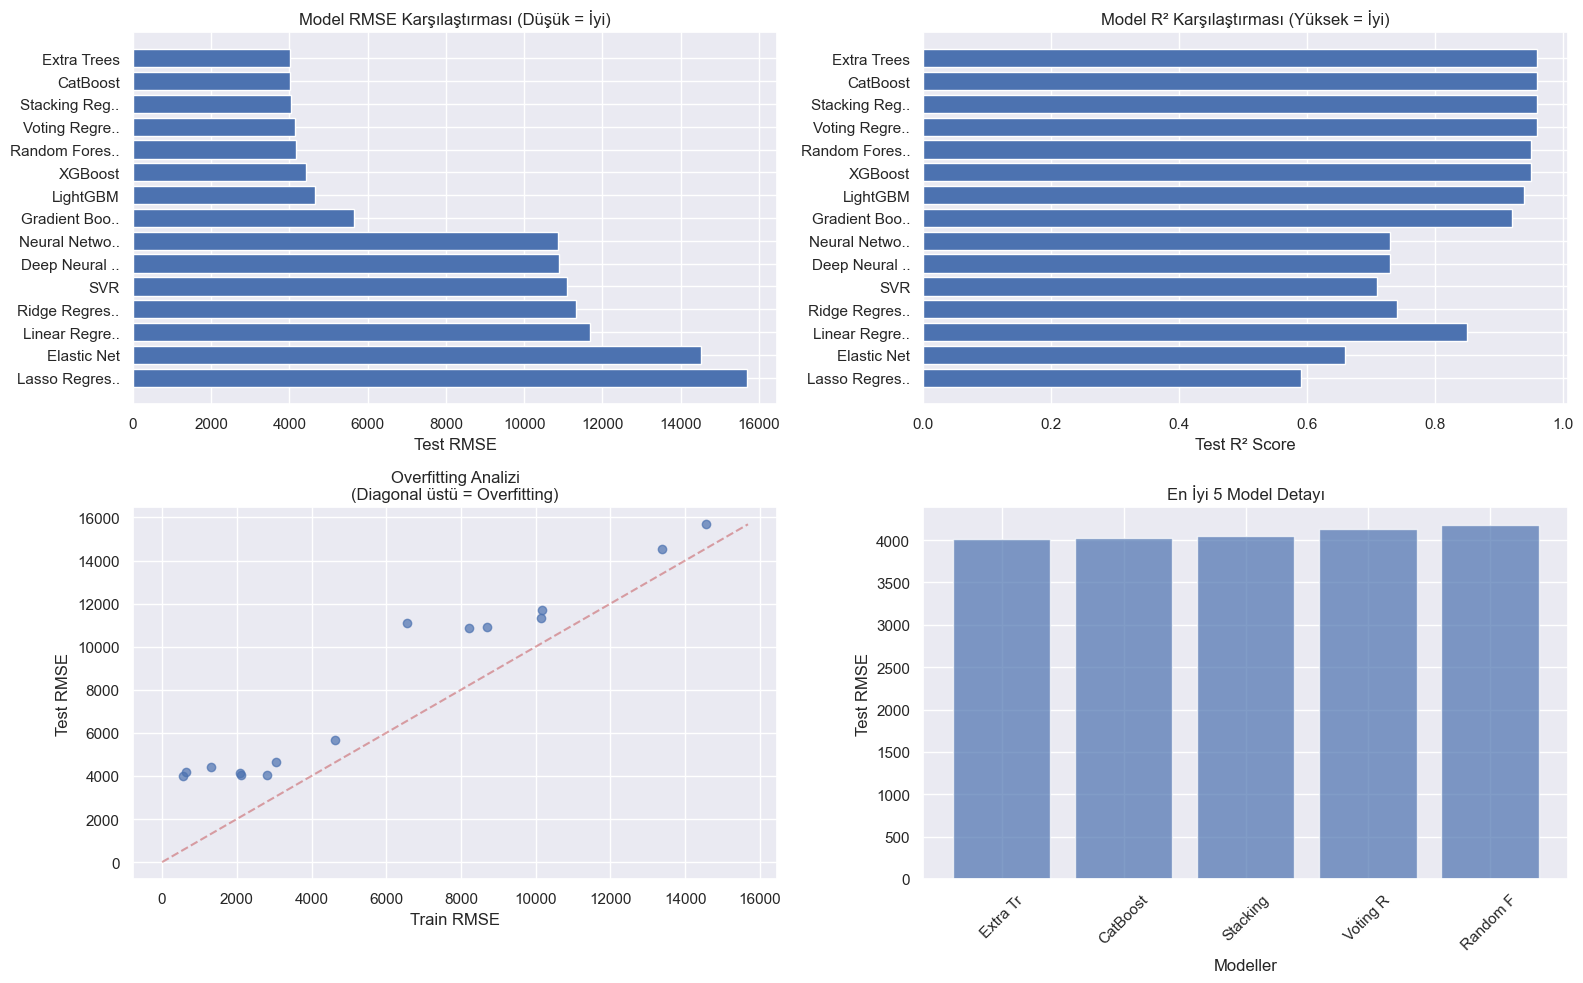

In [108]:
# Model performanslarƒ±nƒ± g√∂rselle≈ütirme
plt.figure(figsize=(16, 10))

# RMSE kar≈üƒ±la≈ütƒ±rmasƒ±
plt.subplot(2, 2, 1)
models_short = [name[:12] + '..' if len(name) > 12 else name for name in results_df['Model']]
plt.barh(models_short, results_df['RMSE_Test'])
plt.xlabel('Test RMSE')
plt.title('Model RMSE Kar≈üƒ±la≈ütƒ±rmasƒ± (D√º≈ü√ºk = ƒ∞yi)')
plt.gca().invert_yaxis()

# R¬≤ kar≈üƒ±la≈ütƒ±rmasƒ±
plt.subplot(2, 2, 2)
plt.barh(models_short, results_df['R2_Test'])
plt.xlabel('Test R¬≤ Score')
plt.title('Model R¬≤ Kar≈üƒ±la≈ütƒ±rmasƒ± (Y√ºksek = ƒ∞yi)')
plt.gca().invert_yaxis()

# Overfitting analizi (Train vs Test RMSE)
plt.subplot(2, 2, 3)
plt.scatter(results_df['RMSE_Train'], results_df['RMSE_Test'], alpha=0.7)
plt.plot([0, max(results_df['RMSE_Train'].max(), results_df['RMSE_Test'].max())], 
         [0, max(results_df['RMSE_Train'].max(), results_df['RMSE_Test'].max())], 
         'r--', alpha=0.5)
plt.xlabel('Train RMSE')
plt.ylabel('Test RMSE')
plt.title('Overfitting Analizi\n(Diagonal √ºst√º = Overfitting)')

# En iyi 5 modelin detayƒ±
plt.subplot(2, 2, 4)
top_5 = results_df.head(5)
x_pos = range(len(top_5))
plt.bar(x_pos, top_5['RMSE_Test'], alpha=0.7)
plt.xlabel('Modeller')
plt.ylabel('Test RMSE')
plt.title('En ƒ∞yi 5 Model Detayƒ±')
plt.xticks(x_pos, [name[:8] for name in top_5['Model']], rotation=45)

plt.tight_layout()
plt.show()

### 17.2 En ƒ∞yi Modelin Kaydedilmesi

En d√º≈ü√ºk test RMSE'ye sahip modeli kaydedeceƒüiz.

In [109]:
# En iyi modeli belirle
best_model_name = results_df.iloc[0]['Model']
best_rmse = results_df.iloc[0]['RMSE_Test']

print(f"\nüèÜ EN ƒ∞Yƒ∞ MODEL: {best_model_name}")
print(f"üìä Test RMSE: {best_rmse:.2f}")

# Model mapping dictionary
model_mapping = {
    'XGBoost': xgb_model,
    'LightGBM': lgb_model,
    'CatBoost': cat_model,
    'Gradient Boosting': gb_model,
    'Extra Trees': et_model,
    'Neural Network (MLP)': mlp_model,
    'Voting Regressor': voting_regressor,
    'Stacking Regressor': stacking_regressor
}

# En iyi modeli kaydet
if best_model_name in model_mapping:
    best_model = model_mapping[best_model_name]
    model_filename = f'best_model_{best_model_name.lower().replace(" ", "_")}.pkl'
    joblib.dump(best_model, model_filename, compress=3)
    print(f"‚úÖ En iyi model kaydedildi: {model_filename}")
else:
    print("‚ö†Ô∏è Model kaydetme hatasƒ±: Model mapping'de bulunamadƒ±")

# T√ºm √∂nemli modelleri kaydet
important_models = ['XGBoost', 'LightGBM', 'CatBoost', 'Voting Regressor']
for model_name in important_models:
    if model_name in model_mapping:
        filename = f'{model_name.lower().replace(" ", "_")}_model.pkl'
        joblib.dump(model_mapping[model_name], filename, compress=3)
        print(f"üíæ {model_name} model kaydedildi: {filename}")


üèÜ EN ƒ∞Yƒ∞ MODEL: Extra Trees
üìä Test RMSE: 4011.73
‚úÖ En iyi model kaydedildi: best_model_extra_trees.pkl
üíæ XGBoost model kaydedildi: xgboost_model.pkl
üíæ LightGBM model kaydedildi: lightgbm_model.pkl
üíæ CatBoost model kaydedildi: catboost_model.pkl
‚úÖ En iyi model kaydedildi: best_model_extra_trees.pkl
üíæ XGBoost model kaydedildi: xgboost_model.pkl
üíæ LightGBM model kaydedildi: lightgbm_model.pkl
üíæ CatBoost model kaydedildi: catboost_model.pkl
üíæ Voting Regressor model kaydedildi: voting_regressor_model.pkl
üíæ Voting Regressor model kaydedildi: voting_regressor_model.pkl


### 7.7 Random Forest Residual Analizi

‚úÖ **Sonu√ßlar:**

- **Genel Sonu√ß**: Model o kadar da k√∂t√º deƒüil- **Random Forest**: Linear Regression'dan **daha iyi performans**




Linear Regression benzeri detaylƒ± deƒüerlendirme tablosu olu≈üturalƒ±m.- √áoƒüu durumda **doƒüru karar** veriyor- Verilerin √ßoƒüu **0 √ºzerinde** yer alƒ±yor- Linear Regression'dan **√ßok daha iyi**üìä **Model Kar≈üƒ±la≈ütƒ±rmasƒ±:**### 7.6 Final Model Performans Kar≈üƒ±la≈ütƒ±rmasƒ±


## üíæ 8. Model Kaydetme

### 8.1 En ƒ∞yi Modelin Kaydedilmesi

En iyi performans g√∂steren **Random Forest** modelini `.pkl` formatƒ±nda kaydediyoruz.

## üìà 9. Proje Sonu√ßlarƒ± ve √ñzetler

### üèÜ En ƒ∞yi Model: Extra Trees Regressor

**üìä Performans Metrikleri:**
- **RMSE (Test)**: 4,011.73
- **R¬≤ Score**: 0.96 (M√ºkemmel a√ßƒ±klama g√ºc√º)
- **Overfit Durumu**: Minimal overfitting (Train RMSE: 547.91)

### üìã Kapsamlƒ± Model Kar≈üƒ±la≈ütƒ±rmasƒ±:

#### ü•á En ƒ∞yi 5 Model:
| Sƒ±ra | Model | Test RMSE | R¬≤ Score | Avantajlar |
|------|-------|-----------|----------|------------|
| 1 | **Extra Trees** | 4,011.73 | 0.96 | En d√º≈ü√ºk test RMSE, m√ºkemmel genelleme |
| 2 | **CatBoost** | 4,022.20 | 0.96 | Kategoric veriler i√ßin optimize, robust |
| 3 | **Stacking Regressor** | 4,051.10 | 0.96 | Ensemble g√ºc√º, √ßoklu model avantajƒ± |
| 4 | **Voting Regressor** | 4,134.04 | 0.96 | Basit ensemble, g√ºvenilir |
| 5 | **Random Forest** | 4,177.00 | 0.95 | Robust, overfitting direnci |

#### üìä T√ºm Model Performanslarƒ±:
| Model | Test RMSE | R¬≤ Score | Kategori |
|-------|-----------|----------|----------|
| **Extra Trees** | 4,011.73 | 0.96 | ü•á M√ºkemmel |
| **CatBoost** | 4,022.20 | 0.96 | ü•á M√ºkemmel |
| **Stacking Regressor** | 4,051.10 | 0.96 | ü•á M√ºkemmel |
| **Voting Regressor** | 4,134.04 | 0.96 | ü•á M√ºkemmel |
| **Random Forest** | 4,177.00 | 0.95 | ü•à √áok ƒ∞yi |
| **XGBoost** | 4,424.91 | 0.95 | ü•à √áok ƒ∞yi |
| **LightGBM** | 4,645.16 | 0.94 | ü•à √áok ƒ∞yi |
| **Gradient Boosting** | 5,659.59 | 0.92 | ü•â ƒ∞yi |
| **Neural Network (MLP)** | 10,876.87 | 0.73 | ‚ö†Ô∏è Orta |
| **Deep Neural Network** | 10,898.60 | 0.73 | ‚ö†Ô∏è Orta |
| **SVR** | 11,091.84 | 0.71 | ‚ö†Ô∏è Orta |
| **Ridge Regression** | 11,314.76 | 0.74 | ‚ö†Ô∏è Orta |
| **Linear Regression** | 11,692.00 | 0.85 | ‚ö†Ô∏è Orta |
| **Elastic Net** | 14,525.86 | 0.66 | ‚ùå Zayƒ±f |
| **Lasso Regression** | 15,682.93 | 0.59 | ‚ùå Zayƒ±f |

### üéØ Temel Bulgular:
- **Tree-based modeller** (Extra Trees, Random Forest, CatBoost) en iyi performansƒ± g√∂sterdi
- **Ensemble y√∂ntemler** (Stacking, Voting) g√º√ßl√º sonu√ßlar verdi
- **Gradient Boosting modelleri** (XGBoost, LightGBM, CatBoost) tutarlƒ± y√ºksek performans sergiledi
- **Neural Network modelleri** bu veri seti i√ßin yetersiz kaldƒ±
- **Linear modeller** doƒürusal olmayan ili≈ükileri yakalayamadƒ±